## Milestone 1 US Eastern Region EDA

The purpose of this EDA is to do a simple EDA analysis on the following Eastern US cities:
* Broward County (FL)
* Jersey City (NJ)
* New York City (NY)
* Cambridge (MA)
* Washington DC

This is one of 3 milestone 1 EDA notebooks the team is conducting on our Airbnb project.

There are 7 different tables in this analysis:
1. calendar
2. listings_detailed
3. listings
4. reviews_detailed
5. reviews
6. neighbourhoods
7. neighbourhoods_json

For each table, we will first conduct a simple initial EDA to explore the total number of rows & columns, whether there are missing values, what are the ranges for each of the columns, and what is the data type for each column. From there, we would then do additional plots for some of the tables as indicated in the below notebook.

In [92]:
import pandas as pd
import spacy
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mannwhitneyu
from statistics import mean
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib.colors import ListedColormap
from collections import Counter
import geopandas as gpd
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [93]:
# Define the directory path for each city
broward_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Broward County'
jersey_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Jersey City'
nyc_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\New York City'
cambridge_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Cambridge'
dc_directory_path = r'C:\Users\tiffa.TIFFANY\OneDrive\Documents\DS 5460 - Big Data Scaling\Final Project\data\usa\Washington DC'


# File names
listings = 'listings.csv'
listings_detailed = 'listings_detailed.csv'
reviews = 'reviews.csv'
reviews_detailed = 'reviews_detailed.csv'
calendar = 'calendar.csv'
neighbourhoods = 'neighbourhoods.csv'
neighbourhoods_json = 'neighbourhoods.geojson'

# Full paths to read in later for each city
broward_calendar_path = broward_directory_path + '\\' + calendar
broward_listings_detailed_path = broward_directory_path + '\\' + listings_detailed
broward_listings_path = broward_directory_path + '\\' + listings
broward_reviews_path = broward_directory_path + '\\' + reviews
broward_reviews_detailed_path = broward_directory_path + '\\' + reviews_detailed
broward_neighbourhoods_path = broward_directory_path + '\\' + neighbourhoods
broward_neighbourhoods_json_path = broward_directory_path + '\\' + neighbourhoods_json

jersey_calendar_path = jersey_directory_path + '\\' + calendar
jersey_listings_detailed_path = jersey_directory_path + '\\' + listings_detailed
jersey_listings_path = jersey_directory_path + '\\' + listings
jersey_reviews_path = jersey_directory_path + '\\' + reviews
jersey_reviews_detailed_path = jersey_directory_path + '\\' + reviews_detailed
jersey_neighbourhoods_path = jersey_directory_path + '\\' + neighbourhoods
jersey_neighbourhoods_json_path = jersey_directory_path + '\\' + neighbourhoods_json

nyc_calendar_path = nyc_directory_path + '\\' + calendar
nyc_listings_detailed_path = nyc_directory_path + '\\' + listings_detailed
nyc_listings_path = nyc_directory_path + '\\' + listings
nyc_reviews_path = nyc_directory_path + '\\' + reviews
nyc_reviews_detailed_path = nyc_directory_path + '\\' + reviews_detailed
nyc_neighbourhoods_path = nyc_directory_path + '\\' + neighbourhoods
nyc_neighbourhoods_json_path = nyc_directory_path + '\\' + neighbourhoods_json

cambridge_calendar_path = cambridge_directory_path + '\\' + calendar
cambridge_listings_detailed_path = cambridge_directory_path + '\\' + listings_detailed
cambridge_listings_path = cambridge_directory_path + '\\' + listings
cambridge_reviews_path = cambridge_directory_path + '\\' + reviews
cambridge_reviews_detailed_path = cambridge_directory_path + '\\' + reviews_detailed
cambridge_neighbourhoods_path = cambridge_directory_path + '\\' + neighbourhoods
cambridge_neighbourhoods_json_path = cambridge_directory_path + '\\' + neighbourhoods_json

dc_calendar_path = dc_directory_path + '\\' + calendar
dc_listings_detailed_path = dc_directory_path + '\\' + listings_detailed
dc_listings_path = dc_directory_path + '\\' + listings
dc_reviews_path = dc_directory_path + '\\' + reviews
dc_reviews_detailed_path = dc_directory_path + '\\' + reviews_detailed
dc_neighbourhoods_path = dc_directory_path + '\\' + neighbourhoods
dc_neighbourhoods_json_path = dc_directory_path + '\\' + neighbourhoods_json

## 1. calendar EDA
In addition to the simple EDA analysis, the calendar EDA will have the following additional plots:
* Mean Price Changes Over Time (both price and adjusted price)
* Average Price by City Based on Availability
* Availability Count Each Day by City
* Explore how many times is price and adjusted price different for each city

In [94]:
# Read in the file paths for calendar_df
broward_calendar_df = pd.read_csv(broward_calendar_path,  na_filter=False)
jersey_calendar_df = pd.read_csv(jersey_calendar_path,  na_filter=False)
nyc_calendar_df = pd.read_csv(nyc_calendar_path,  na_filter=False)
cambridge_calendar_df = pd.read_csv(cambridge_calendar_path,  na_filter=False)
dc_calendar_df = pd.read_csv(dc_calendar_path,  na_filter=False)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\4164731993.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  broward_calendar_df = pd.read_csv(broward_calendar_path,  na_filter=False)
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\4164731993.py:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  jersey_calendar_df = pd.read_csv(jersey_calendar_path,  na_filter=False)
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\4164731993.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_calendar_df = pd.read_csv(nyc_calendar_path,  na_filter=False)


In [95]:
# Do some initial data cleaning to properly conduct EDA analysis
def convert_calendar_data(df):
    # Convert price columns to numeric after removing '$' and ','
    df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
    df['adjusted_price'] = pd.to_numeric(df['adjusted_price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
    
    # Convert date column to datetime and extract date part
    df['date'] = pd.to_datetime(df['date']).dt.date
    df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
    df['maximum_nights'] = pd.to_numeric(df['maximum_nights'], errors='coerce')
    
    return df

# Applying the conversion function to each dataframe
broward_calendar_df = convert_calendar_data(broward_calendar_df)
jersey_calendar_df = convert_calendar_data(jersey_calendar_df)
nyc_calendar_df = convert_calendar_data(nyc_calendar_df)
cambridge_calendar_df = convert_calendar_data(cambridge_calendar_df)
dc_calendar_df = convert_calendar_data(dc_calendar_df)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\316503878.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\316503878.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['adjusted_price'] = pd.to_numeric(df['adjusted_price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\316503878.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *no

##### Get standard EDA for calendar_df such as number of rows & columns, missing values, ranges, and data types

In [96]:
def analyze_dataframes(dataframes, threshold=20):
    """
    Iterates through a list of DataFrames and prints out the analysis for each column:
    - For numeric columns: range (min to max)
    - For date columns: range (earliest to latest date)
    - For categorical columns: unique values or count of unique categories based on a specified threshold
    - Shows columns with missing values and the count of missing values
    Also prints the total number of rows, columns, and missing values for each DataFrame.
    
    Parameters:
    - dataframes: A dictionary of DataFrames with the key being the DataFrame name and the value being the DataFrame object.
    - threshold: The maximum number of unique values to print for categorical columns with a default at 20.
    """
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        # Analyzing by datatype
        for column in df.columns:
            if pd.api.types.is_numeric_dtype(df[column]):
                min_value = df[column].min()
                median_value = df[column].median()
                mean_value = df[column].mean()
                std_deviation = df[column].std()
                max_value = df[column].max()
                print(f"{column} (Numerical): Min = {min_value}, Median = {median_value}, Mean = {mean_value}, Std Dev = {std_deviation}, Max = {max_value}")
            elif pd.api.types.is_object_dtype(df[column]) and isinstance(df[column].dropna().iloc[0], (pd.Timestamp, datetime.date)):
                min_date = df[column].min()
                max_date = df[column].max()
                print(f"{column} (Date): Range = {min_date} to {max_date}")
            else:
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {unique_values}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")
        
dataframes = {
    'Broward County': broward_calendar_df,
    'Jersey City': jersey_calendar_df,
    'New York City': nyc_calendar_df,
    'Cambridge': cambridge_calendar_df,
    'Washington DC': dc_calendar_df
}

analyze_dataframes(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 6168116, Total Columns: 7
Total Missing Values: 1366
Missing Values by Column:
 - price: 682 missing values
 - adjusted_price: 682 missing values
 - minimum_nights: 1 missing values
 - maximum_nights: 1 missing values
listing_id (Numerical): Min = 57818, Median = 53655816.0, Mean = 3.3347304521641965e+17, Std Dev = 3.611903105753147e+17, Max = 855979244654886532
date (Date): Range = 2023-03-27 to 2024-03-31
available (Categorical): Categories = ['f' 't']
price (Numerical): Min = 0.0, Median = 206.0, Mean = 357.0895626933341, Std Dev = 1154.798893146705, Max = 100000.0
adjusted_price (Numerical): Min = 0.0, Median = 204.0, Mean = 354.0068968715352, Std Dev = 1151.7981684906688, Max = 100000.0
minimum_nights (Numerical): Min = 1.0, Median = 3.0, Mean = 5.912350207478298, Std Dev = 18.92545439094449, Max = 500.0
maximum_nights (Numerical): Min = 1.0, Median = 1125.0, Mean = 1144084.7205013202, Std Dev = 49538112.20080994, Max = 2147483647.

##### Mean Price Changes Over Time (both price and adjusted price) Plots

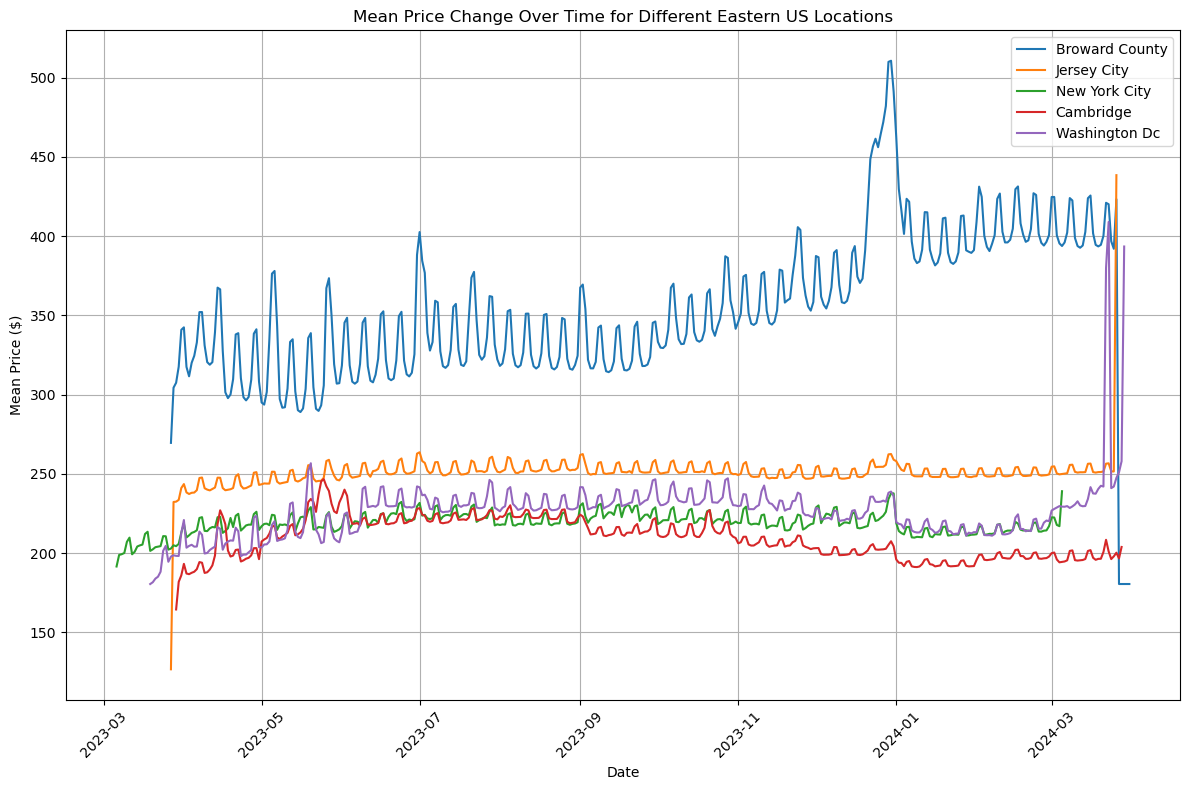

In [97]:
dataframes = {
    'Broward County': broward_calendar_df,
    'Jersey City': jersey_calendar_df,
    'New York City': nyc_calendar_df,
    'Cambridge': cambridge_calendar_df,
    'Washington DC': dc_calendar_df
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in dataframes.items():
    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Price Change Over Time for Different Eastern US Locations')
plt.xlabel('Date')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

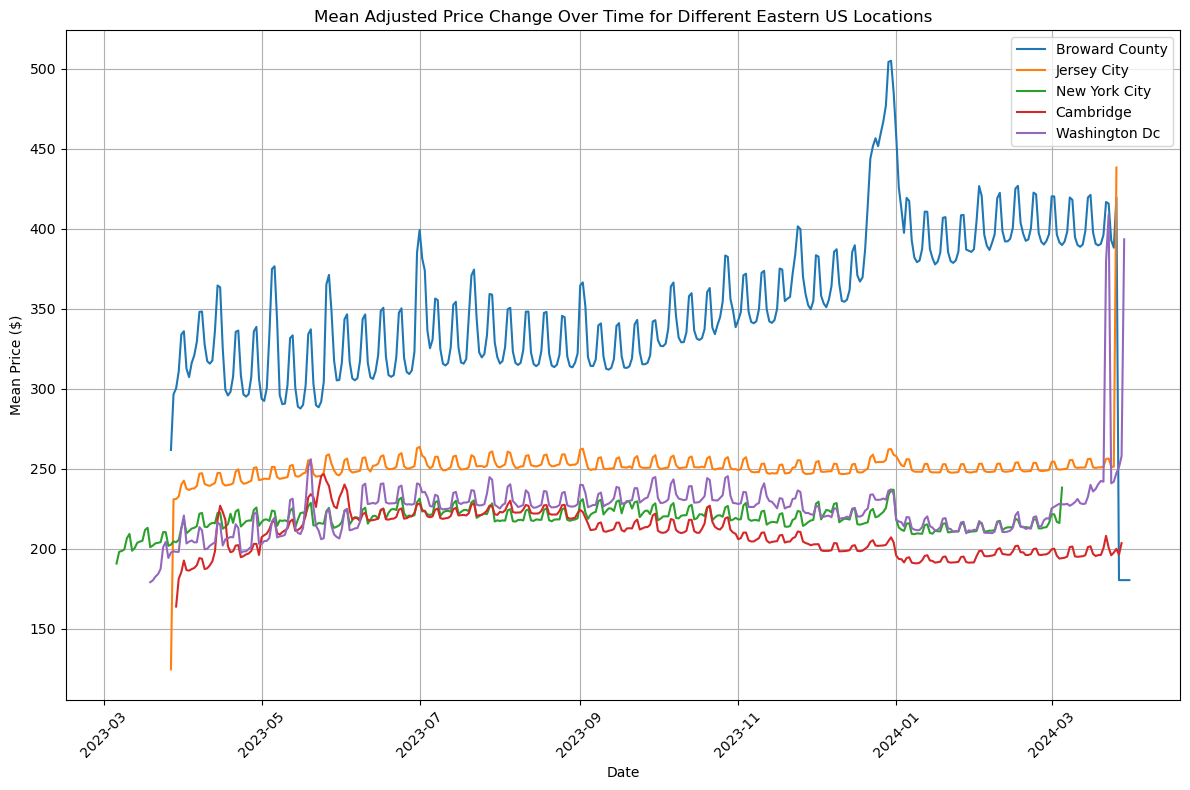

In [98]:
dataframes = {
    'Broward County': broward_calendar_df,
    'Jersey City': jersey_calendar_df,
    'New York City': nyc_calendar_df,
    'Cambridge': cambridge_calendar_df,
    'Washington DC': dc_calendar_df
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in dataframes.items():
    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['adjusted_price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Adjusted Price Change Over Time for Different Eastern US Locations')
plt.xlabel('Date')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

##### Average Price by City Based on Availability

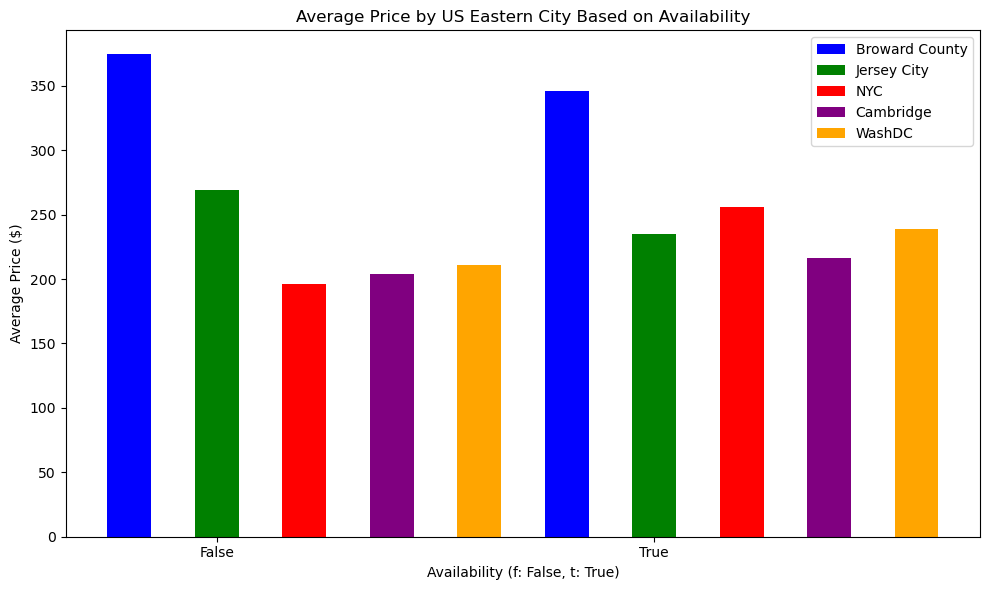

In [99]:
data_info = [
    ('Broward County', broward_calendar_df),
    ('Jersey City', jersey_calendar_df),
    ('NYC', nyc_calendar_df),
    ('Cambridge', cambridge_calendar_df),
    ('WashDC', dc_calendar_df)
]

plt.figure(figsize=(10, 6))

# Colors for each location
colors = ['blue', 'green', 'red', 'purple', 'orange']
offset = 0.0
width = 0.1

for i, (label, df) in enumerate(data_info):
    price_by_available = df.groupby('available')['price'].mean()
    
    # Create bar positions
    positions = [offset + x for x in range(len(price_by_available))]
    
    plt.bar(positions, price_by_available.values, width=width, color=colors[i], label=label)
    
    offset += 0.2  # Increase offset for the next location

plt.title('Average Price by US Eastern City Based on Availability')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price ($)')

plt.xticks([i + (len(data_info) - 1) * width / 2 for i in range(2)], ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()

##### Availability Count Each Day by City
There will be a graphic for each city to see what is its availability on any given day.

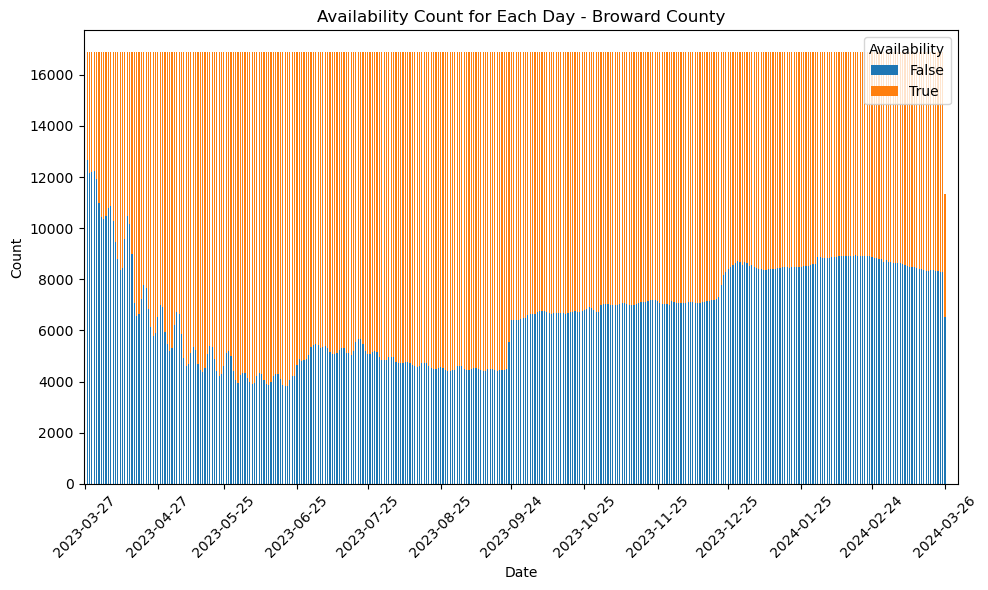

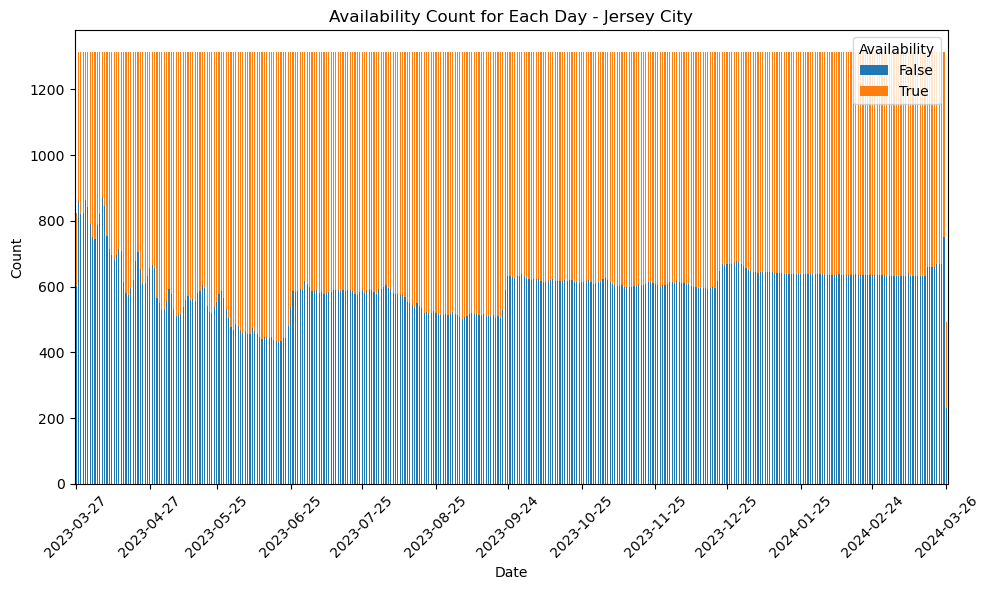

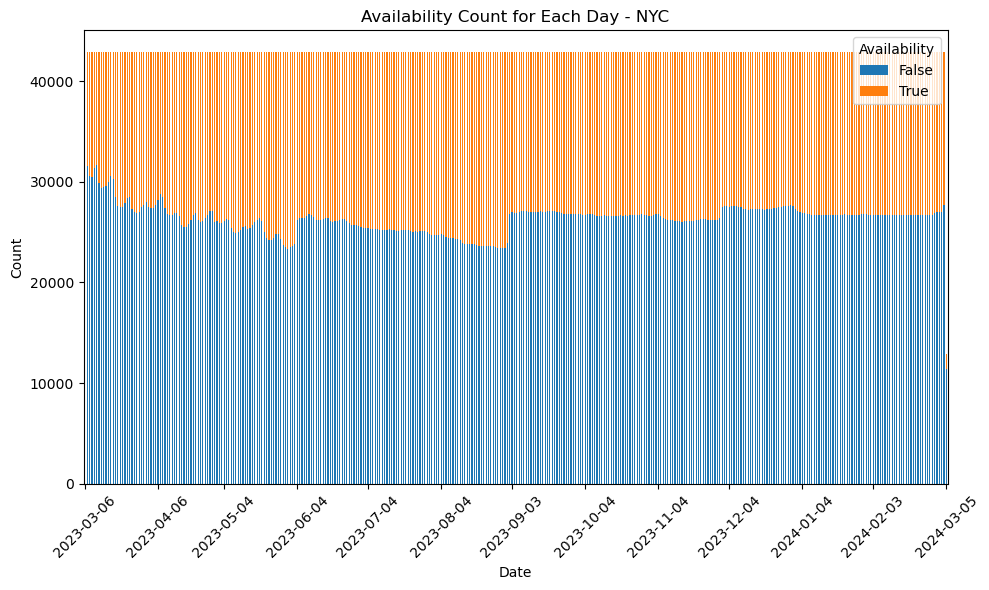

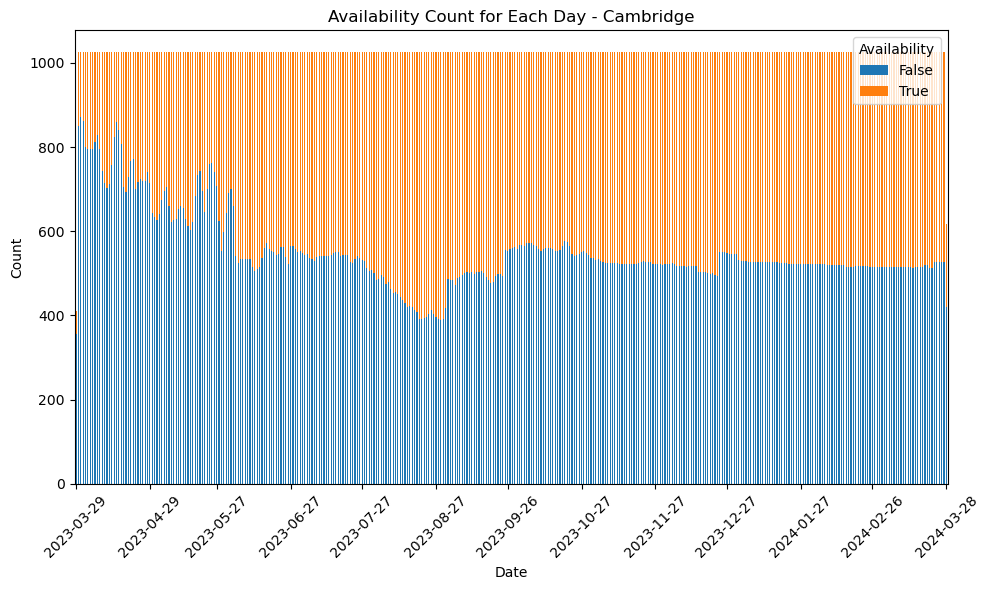

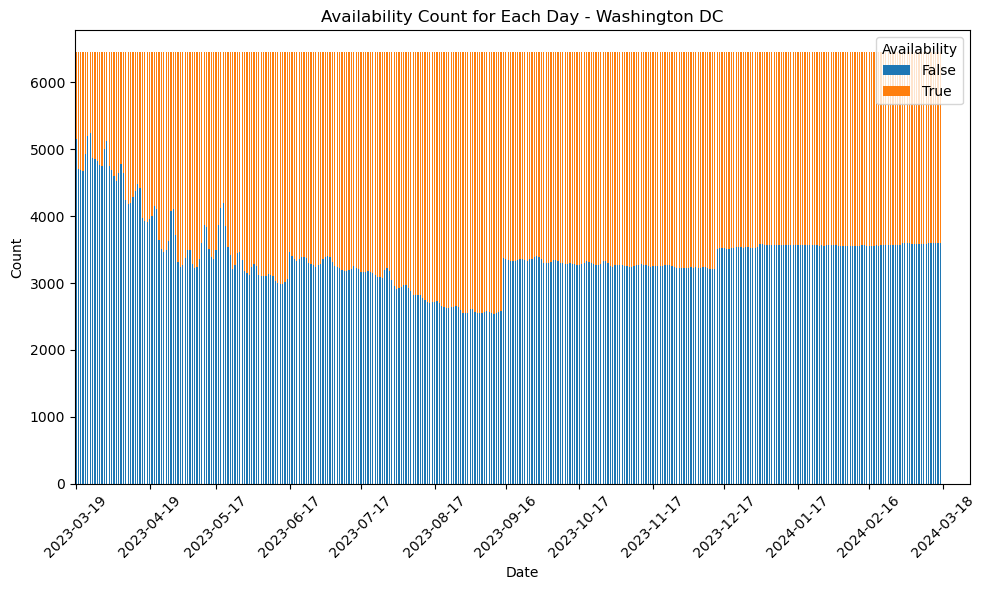

In [103]:
def plot_availability_by_date(df, city_name):
    """
    Plots the availability count for each day for the given city.

    Parameters:
    - df: DataFrame with 'date' and 'available' columns
    - city_name: The name of the city for titling the plot.
    """
    
    # Group the data by 'date' and 'available', and count occurrences
    availability_counts = df.groupby(['date', 'available']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(10, 6))
    # Plotting
    availability_counts.plot(kind='bar', stacked=True, ax=plt.gca())
    
    # Set the x-axis tick locator to show labels
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.title(f'Availability Count for Each Day - {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Adjust legend labels
    plt.legend(title='Availability', labels=['False', 'True'])
    
    plt.tight_layout()
    plt.show()


dataframes = {
    'Broward County': broward_calendar_df,
    'Jersey City': jersey_calendar_df,
    'NYC': nyc_calendar_df,
    'Cambridge': cambridge_calendar_df,
    'Washington DC': dc_calendar_df
}

for city_name, df in dataframes.items():
    plot_availability_by_date(df, city_name)

##### Explore how many times is price and adjusted price different for each city

This involves getting the price statistics such as the min, max, average and median. We will also explore the min, max, average and median for price differences between price and adjusted price.

In [104]:
def calculate_price_stats(df):
    """
    Calculate maximum, minimum, average, and median prices from the "price" and "adjusted_price" columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing columns named "price" and "adjusted_price".

    Returns:
    - price_stats: dictionary containing the maximum, minimum, average, and median prices for both "price" and "adjusted_price".
    """

    # Calculate statistics for "price" column
    max_price = df['price'].max()
    min_price = df['price'].min()
    avg_price = df['price'].mean()
    median_price = df['price'].median()

    # Calculate statistics for "adjusted_price" column
    max_adjusted_price = df['adjusted_price'].max()
    min_adjusted_price = df['adjusted_price'].min()
    avg_adjusted_price = df['adjusted_price'].mean()
    median_adjusted_price = df['adjusted_price'].median()

    price_stats = {
        "maximum_price": max_price,
        "minimum_price": min_price,
        "average_price": avg_price,
        "median_price": median_price,
        "maximum_adjusted_price": max_adjusted_price,
        "minimum_adjusted_price": min_adjusted_price,
        "average_adjusted_price": avg_adjusted_price,
        "median_adjusted_price": median_adjusted_price
    }

    return price_stats

In [105]:
def calculate_price_difference_stats(df):
    """
    Calculate the range of absolute price differences between 'price' and 'adjusted_price' columns
    for a given DataFrame, excluding rows where the price difference is zero.

    Parameters:
    - df: pandas DataFrame containing 'price' and 'adjusted_price' columns.

    """

    # Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
    df['price_difference'] = df['price'] - df['adjusted_price']

    # Calculate the absolute value of the price difference
    df['price_difference_abs'] = df['price_difference'].abs()

    # Filter out rows where the price difference is zero
    non_zero_diff_rows = df[df['price_difference'] != 0]

    # Calculate the range of the absolute price difference for non-zero difference rows
    price_difference_range_abs = {
        'max': non_zero_diff_rows['price_difference_abs'].max(),
        'min': non_zero_diff_rows['price_difference_abs'].min(),
        'median': non_zero_diff_rows['price_difference_abs'].median(),
        'average': non_zero_diff_rows['price_difference_abs'].mean()
    }

    print("Absolute Price Difference Range (Excluding Zero Differences):")
    print(price_difference_range_abs)
    print("\n")

    print("Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):")
    print(len(non_zero_diff_rows))


In [106]:
calculate_price_stats(broward_calendar_df)

{'maximum_price': 100000.0,
 'minimum_price': 0.0,
 'average_price': 357.0895626933341,
 'median_price': 206.0,
 'maximum_adjusted_price': 100000.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 354.0068968715352,
 'median_adjusted_price': 204.0}

In [107]:
calculate_price_stats(jersey_calendar_df)

{'maximum_price': 99999.0,
 'minimum_price': 10.0,
 'average_price': 250.8298372769961,
 'median_price': 129.0,
 'maximum_adjusted_price': 99999.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 250.7145153756975,
 'median_adjusted_price': 129.0}

In [108]:
calculate_price_stats(nyc_calendar_df)

{'maximum_price': 100000.0,
 'minimum_price': 0.0,
 'average_price': 219.1346835398106,
 'median_price': 135.0,
 'maximum_adjusted_price': 100000.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 218.723912383267,
 'median_adjusted_price': 135.0}

In [109]:
calculate_price_stats(cambridge_calendar_df)

{'maximum_price': 5837.0,
 'minimum_price': 10.0,
 'average_price': 209.53694624689578,
 'median_price': 181.0,
 'maximum_adjusted_price': 5837.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 209.4467729445379,
 'median_adjusted_price': 180.0}

In [110]:
calculate_price_stats(dc_calendar_df)

{'maximum_price': 10000.0,
 'minimum_price': 0.0,
 'average_price': 224.18714655029694,
 'median_price': 140.0,
 'maximum_adjusted_price': 10000.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 223.02636529963365,
 'median_adjusted_price': 140.0}

In [111]:
calculate_price_difference_stats(broward_calendar_df)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 4000.0, 'min': 1.0, 'median': 21.0, 'average': 47.746476839820794}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
430126


In [112]:
calculate_price_difference_stats(jersey_calendar_df)


Absolute Price Difference Range (Excluding Zero Differences):
{'max': 280.0, 'min': 1.0, 'median': 8.0, 'average': 16.5963413166446}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
8309


In [113]:
calculate_price_difference_stats(nyc_calendar_df)


Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1530.0, 'min': 1.0, 'median': 13.0, 'average': 31.55471425222149}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
303949


In [114]:
calculate_price_difference_stats(cambridge_calendar_df)


Absolute Price Difference Range (Excluding Zero Differences):
{'max': 350.0, 'min': 1.0, 'median': 5.0, 'average': 12.484361518550475}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
9272


In [115]:
calculate_price_difference_stats(dc_calendar_df)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 900.0, 'min': 1.0, 'median': 13.0, 'average': 29.683631385747542}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
114689


## 2. listings_detailed EDA

The listings_detailed EDA will have the following additional plots:
* Host Sign-Ups by Year (Utilizing Host_since by Year) within the Eastern US
* Comparison of Room Type Counts Across Eastern US Cities
* Average Price by Number of Accommodates/Peopled Allowed for Different Eastern US Cities
    - This involves looking at all of the cities together and then each city individually
* Number of Reviews for each Neighborhood within an Eastern US City
* Correlation Heatmap of Review Scores and Price for each Eastern US City

In [116]:
broward_listings_detailed_df = pd.read_csv(broward_listings_detailed_path,  na_filter=False)
jersey_listings_detailed_df = pd.read_csv(jersey_listings_detailed_path,  na_filter=False)
nyc_listings_detailed_df = pd.read_csv(nyc_listings_detailed_path,  na_filter=False)
cambridge_listings_detailed_df = pd.read_csv(cambridge_listings_detailed_path,  na_filter=False)
dc_listings_detailed_df = pd.read_csv(dc_listings_detailed_path,  na_filter=False)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\1018087269.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  broward_listings_detailed_df = pd.read_csv(broward_listings_detailed_path,  na_filter=False)
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\1018087269.py:3: DtypeWarning: Columns (22,23,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_listings_detailed_df = pd.read_csv(nyc_listings_detailed_path,  na_filter=False)


In [117]:
# Conduct some initial data cleaning on listings_detailed data

def convert_listings_detailed_data(df):
    # Convert price columns to numeric after removing '$' and ','
    df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
    
    # Convert date column to datetime and extract date part
    df['host_since'] = pd.to_datetime(df['host_since']).dt.date
    

    columns_to_convert = [
    'host_total_listings_count',
    'bedrooms',
    'beds',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
    ]
        
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    
    return df

# Applying the conversion function to each dataframe
broward_listings_detailed_df = convert_listings_detailed_data(broward_listings_detailed_df)
jersey_listings_detailed_df = convert_listings_detailed_data(jersey_listings_detailed_df)
nyc_listings_detailed_df = convert_listings_detailed_data(nyc_listings_detailed_df)
cambridge_listings_detailed_df = convert_listings_detailed_data(cambridge_listings_detailed_df)
dc_listings_detailed_df = convert_listings_detailed_data(dc_listings_detailed_df)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\2991682155.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\2991682155.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\2991682155.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated a

##### Get standard EDA for listings_detailed such as number of rows & columns, missing values, ranges, and data types

In [118]:
def analyze_dataframes_listings_detailed(dataframes, threshold=20):
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        # Handling columns by data type
        for column in df.columns:
            if pd.api.types.is_numeric_dtype(df[column]):
                # Calculate statistics
                min_value = df[column].min()
                median_value = df[column].median()
                mean_value = df[column].mean()
                std_deviation = df[column].std()
                max_value = df[column].max()
                # Print statistics
                print(f"{column} (Numerical): Min = {min_value}, Median = {median_value}, Mean = {mean_value}, Std Dev = {std_deviation}, Max = {max_value}")
            elif pd.api.types.is_object_dtype(df[column]) and all(isinstance(x, (datetime.date, type(pd.NaT))) for x in df[column].dropna()):
                # Handle date columns
                non_na_values = df[column].dropna()
                if non_na_values.empty:
                    min_date = max_date = "No Dates Available"
                else:
                    min_date = non_na_values.min()
                    max_date = non_na_values.max()
                print(f"{column} (Date): Range = {min_date} to {max_date}")
            else:
                # Handle categorical columns
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {unique_values}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")

dataframes = {
    'Broward County': broward_listings_detailed_df,
    'Jersey City': jersey_listings_detailed_df,
    'New York City': nyc_listings_detailed_df,
    'Cambridge': cambridge_listings_detailed_df,
    'Washington DC': dc_listings_detailed_df
}

analyze_dataframes_listings_detailed(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 16899, Total Columns: 75
Total Missing Values: 24461
Missing Values by Column:
 - host_since: 1 missing values
 - host_total_listings_count: 1 missing values
 - bedrooms: 1332 missing values
 - beds: 197 missing values
 - review_scores_rating: 2837 missing values
 - review_scores_accuracy: 2876 missing values
 - review_scores_cleanliness: 2876 missing values
 - review_scores_checkin: 2876 missing values
 - review_scores_communication: 2876 missing values
 - review_scores_location: 2876 missing values
 - review_scores_value: 2876 missing values
 - reviews_per_month: 2837 missing values
id (Numerical): Min = 57818, Median = 53655816.0, Mean = 3.334714145876098e+17, Std Dev = 3.612008167622543e+17, Max = 855979244654886532
listing_url (Categorical): 16899 unique categories
scrape_id (Numerical): Min = 20230327145536, Median = 20230327145536.0, Mean = 20230327145536.0, Std Dev = 0.0, Max = 20230327145536
last_scraped (Categorical): Categori

listing_url (Categorical): 42931 unique categories
scrape_id (Numerical): Min = 20230306014634, Median = 20230306014634.0, Mean = 20230306014625.89, Std Dev = 8.10946944826201, Max = 20230306014634
last_scraped (Categorical): Categories = ['2023-03-06' '2023-03-07']
source (Categorical): Categories = ['city scrape' 'previous scrape']
name (Categorical): 41410 unique categories
description (Categorical): 38023 unique categories
neighborhood_overview (Categorical): 19580 unique categories
picture_url (Categorical): 41814 unique categories
host_id (Numerical): Min = 1678, Median = 74338125.0, Mean = 151601209.0219189, Std Dev = 162130107.5675579, Max = 503872891
host_url (Categorical): 27455 unique categories
host_name (Categorical): 9832 unique categories
host_since (Date): Range = 2008-08-11 to 2023-03-04
host_location (Categorical): 1126 unique categories
host_about (Categorical): 14284 unique categories
host_response_time (Categorical): Categories = ['N/A' 'within an hour' 'a few days

description (Categorical): 5862 unique categories
neighborhood_overview (Categorical): 3261 unique categories
picture_url (Categorical): 6290 unique categories
host_id (Numerical): Min = 4492, Median = 53222831.0, Mean = 119661224.49264136, Std Dev = 138452532.60542703, Max = 505882163
host_url (Categorical): 3364 unique categories
host_name (Categorical): 1953 unique categories
host_since (Date): Range = 2008-11-21 to 2023-03-17
host_location (Categorical): 190 unique categories
host_about (Categorical): 1870 unique categories
host_response_time (Categorical): Categories = ['N/A' 'within an hour' 'within a few hours' 'within a day'
 'a few days or more']
host_response_rate (Categorical): 44 unique categories
host_acceptance_rate (Categorical): 70 unique categories
host_is_superhost (Categorical): Categories = ['f' 't' '']
host_thumbnail_url (Categorical): 3321 unique categories
host_picture_url (Categorical): 3321 unique categories
host_neighbourhood (Categorical): 187 unique categori

##### Host Sign-Ups by Year (Utilizing Host_since by Year) within the Eastern US

Plot will show as of January of each year

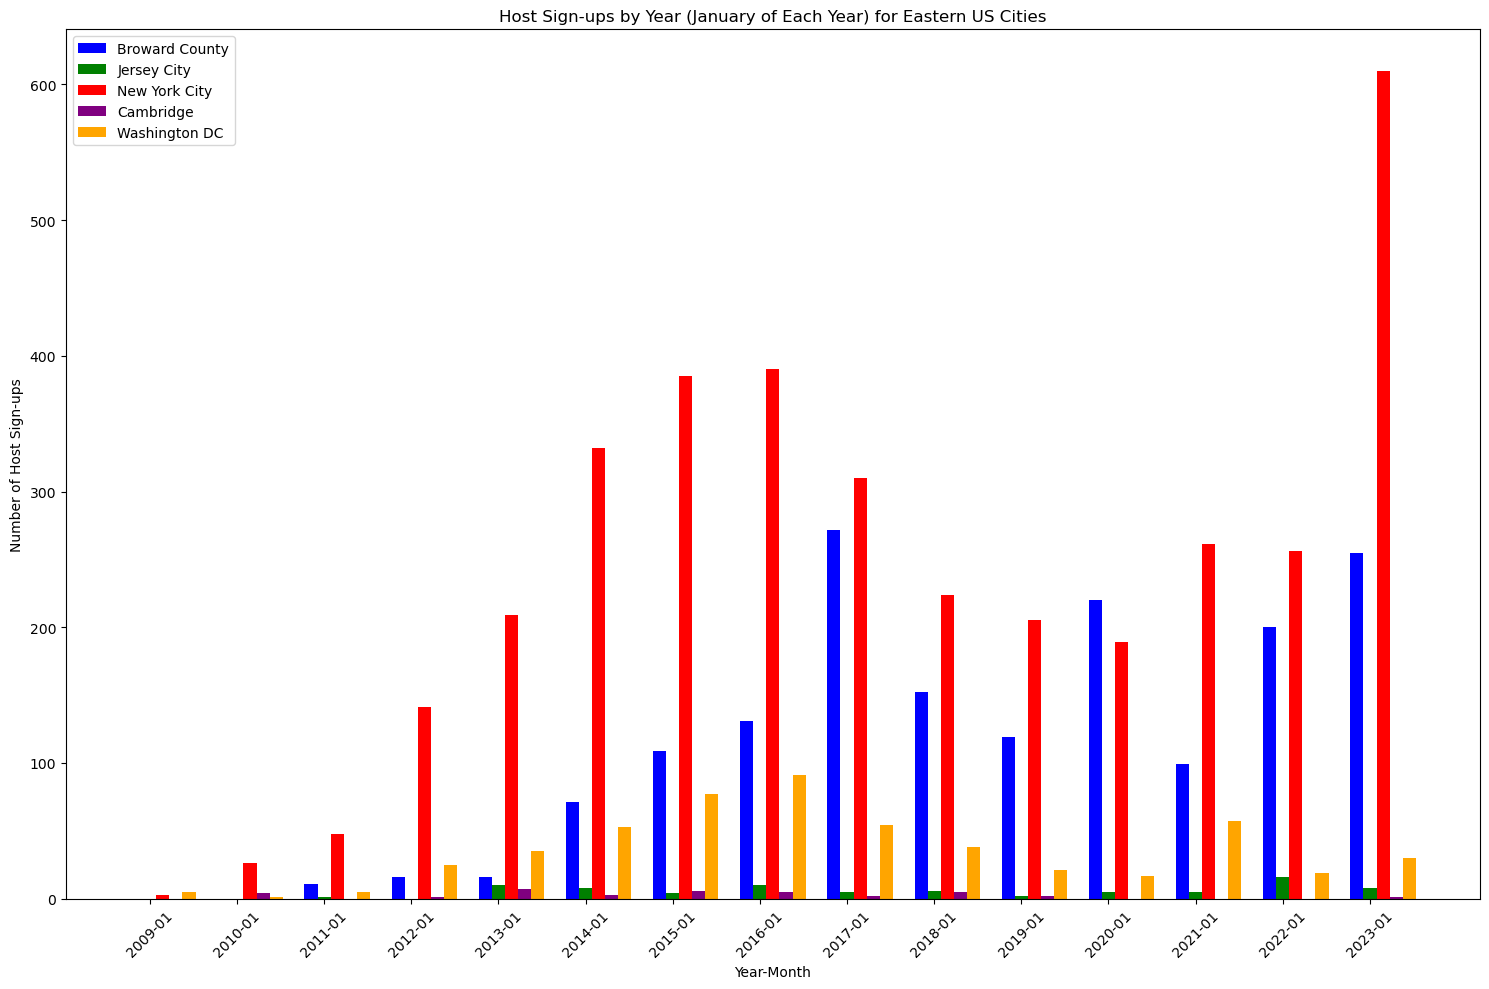

In [120]:
def plot_yearly_monthly_counts(dataframes):
    """
    Plots the monthly counts for each DataFrame with x-axis labels for the first month of each year.

    """
    plt.figure(figsize=(15, 10))
    
    # Set up colors for each city
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    width = 0.15  # Bar width
    
    # Get the unique 'Year-Month' for January across all datasets
    all_jan_months = []
    for df in dataframes.values():
        df['Year-Month'] = pd.to_datetime(df['host_since']).dt.to_period('M')
        jan_months = df[df['Year-Month'].dt.month == 1]['Year-Month'].unique()
        all_jan_months.extend(jan_months)
    all_jan_months = sorted(set(all_jan_months))

    # Create positions for the bars
    positions = np.arange(len(all_jan_months))
    
    for i, (city, df) in enumerate(dataframes.items()):
        # Group by 'Year-Month' and count instances, reindex to include all January months
        monthly_counts = df.groupby('Year-Month').size().reindex(all_jan_months, fill_value=0)
        
        plt.bar(positions + i * width, monthly_counts.values, width=width, color=colors[i], label=city)
    
    # Set x-axis ticks and labels to January of each year
    plt.xticks(positions + width, [str(month) for month in all_jan_months], rotation=45)
    plt.title('Host Sign-ups by Year (January of Each Year) for Eastern US Cities')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Host Sign-ups')
    plt.legend()
    plt.tight_layout()
    
    plt.show()


dataframes = {
    'Broward County': broward_listings_detailed_df,
    'Jersey City': jersey_listings_detailed_df,
    'New York City': nyc_listings_detailed_df,
    'Cambridge': cambridge_listings_detailed_df,
    'Washington DC': dc_listings_detailed_df
}

plot_yearly_monthly_counts(dataframes)

##### Comparison of Room Type Counts Across Eastern US Cities

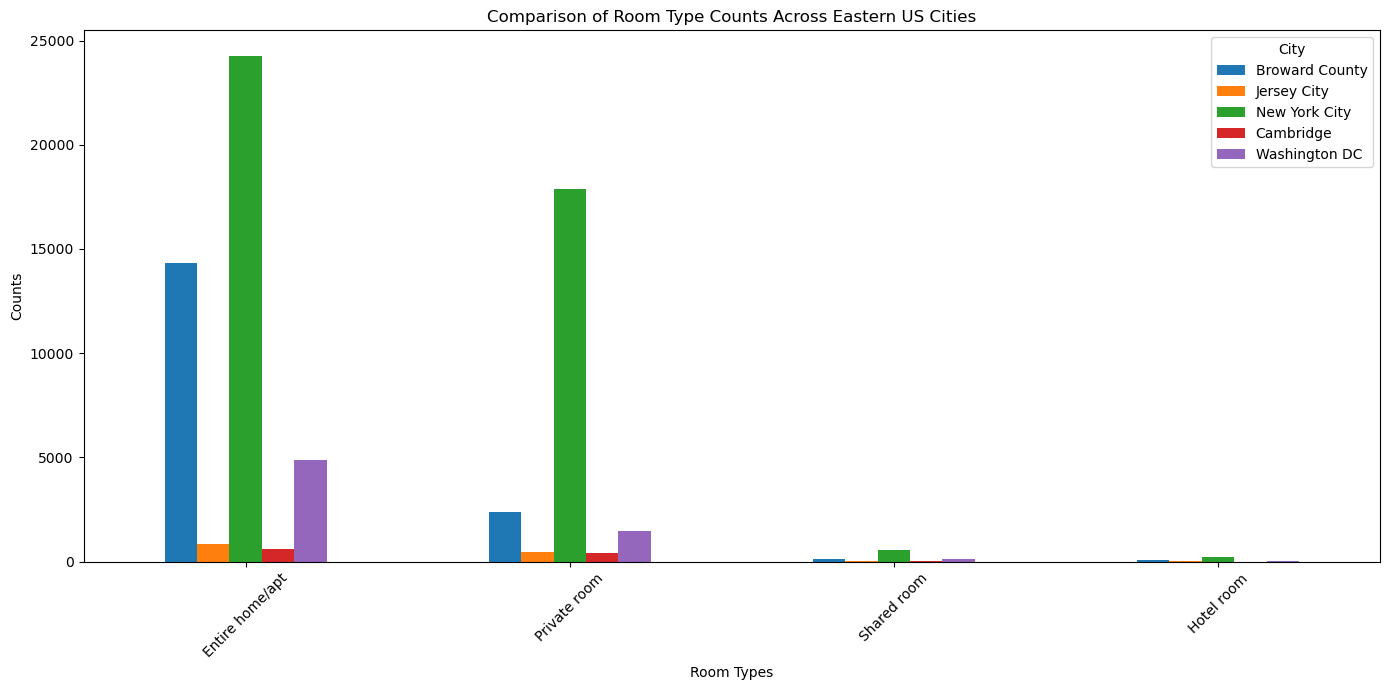

In [121]:
def plot_room_type_comparison(dataframes):

    room_type_counts = pd.DataFrame()

    # Calculate the value counts and add them to the room_type_counts DataFrame
    for city, df in dataframes.items():
        room_type_counts[city] = df['room_type'].value_counts()

    # Fill NaN with 0s for cities without certain room types
    room_type_counts = room_type_counts.fillna(0)  
    
    room_type_counts.plot(kind='bar', figsize=(14, 7))

    plt.title('Comparison of Room Type Counts Across Eastern US Cities')
    plt.xlabel('Room Types')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.legend(title='City')
    plt.tight_layout()

    plt.show()
    
dataframes = {
    'Broward County': broward_listings_detailed_df,
    'Jersey City': jersey_listings_detailed_df,
    'New York City': nyc_listings_detailed_df,
    'Cambridge': cambridge_listings_detailed_df,
    'Washington DC': dc_listings_detailed_df
}

plot_room_type_comparison(dataframes)

##### Average Price by Number of Accommodates/Peopled Allowed for Different Eastern US Cities

We will have plots that show each of the different Eastern US cities side-by-side and we will have plots that look at each Eastern US city individually.

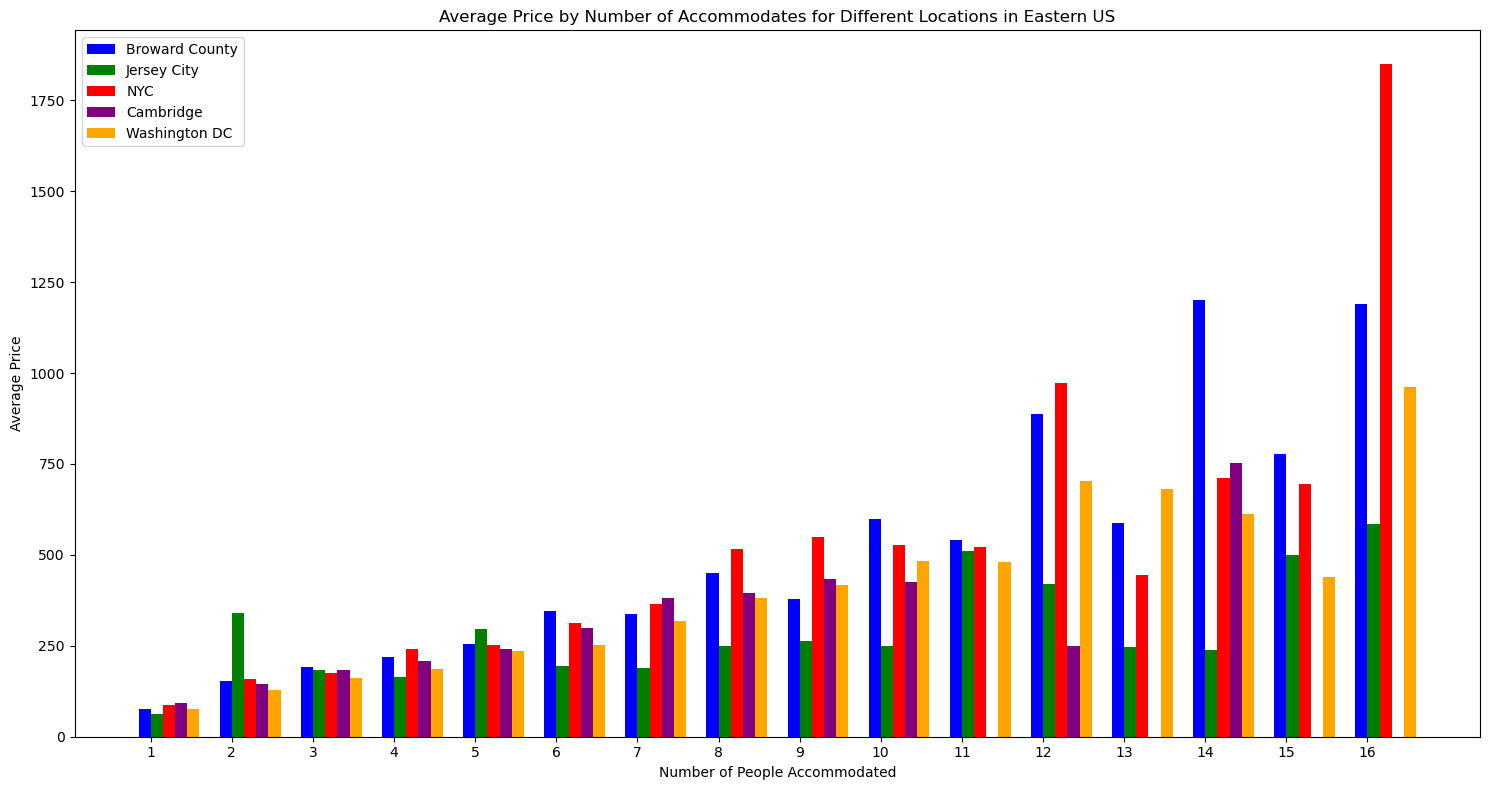

In [126]:
data_info = [
    ('Broward County', broward_listings_detailed_df),
    ('Jersey City', jersey_listings_detailed_df),
    ('NYC', nyc_listings_detailed_df),
    ('Cambridge', cambridge_listings_detailed_df),
    ('Washington DC', dc_listings_detailed_df)
]

plt.figure(figsize=(15, 8))

# Colors for each location
colors = ['blue', 'green', 'red', 'purple', 'orange']
width = 0.15  # Bar width

# Find the maximum value of 'accommodates' across all DataFrames
max_accommodates = max(df['accommodates'].max() for _, df in data_info)

# Create a consistent range of 'accommodates' values
positions = np.arange(1, max_accommodates + 1)

for i, (label, df) in enumerate(data_info):
    # Calculate mean price by 'accommodates', ensuring we have a value for each position
    price_by_accommodates = df.groupby('accommodates')['price'].mean().reindex(positions, fill_value=0)
    
    # Offset the positions for each city's bars
    bar_positions = positions - width + i * width
    
    plt.bar(bar_positions, price_by_accommodates.values, width=width, color=colors[i], label=label)

# Configure x-ticks to be in the center of the grouped bars
plt.xticks(positions - width / 2, positions)

plt.title('Average Price by Number of Accommodates for Different Locations in Eastern US')
plt.xlabel('Number of People Accommodated')
plt.ylabel('Average Price')
plt.legend()
plt.tight_layout()
plt.show()

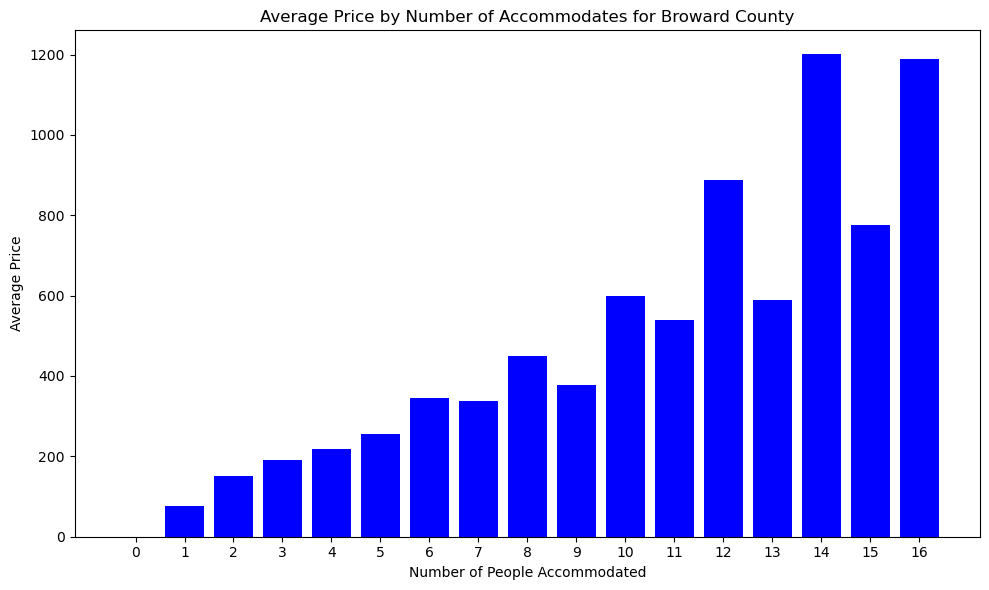

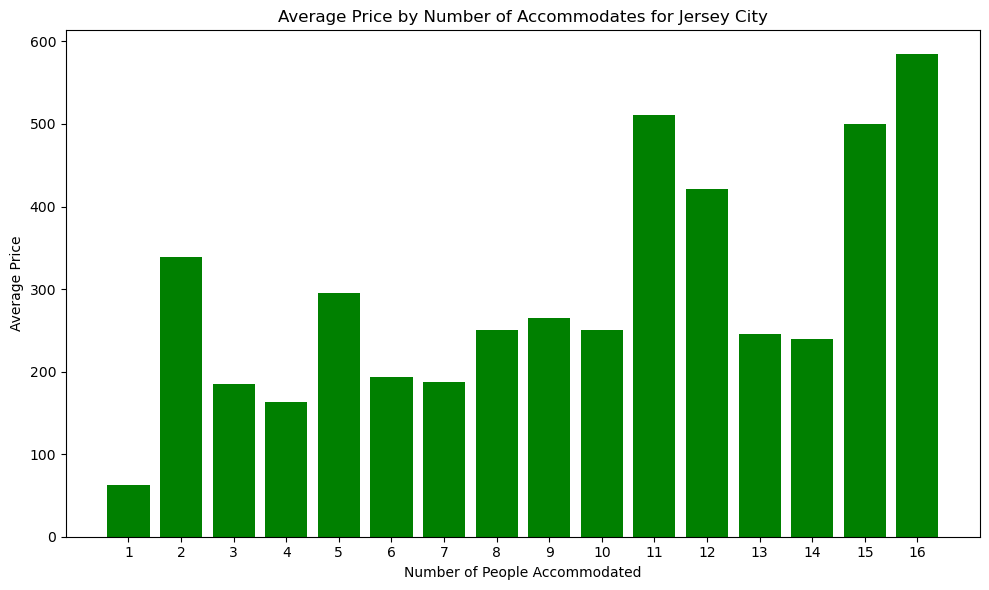

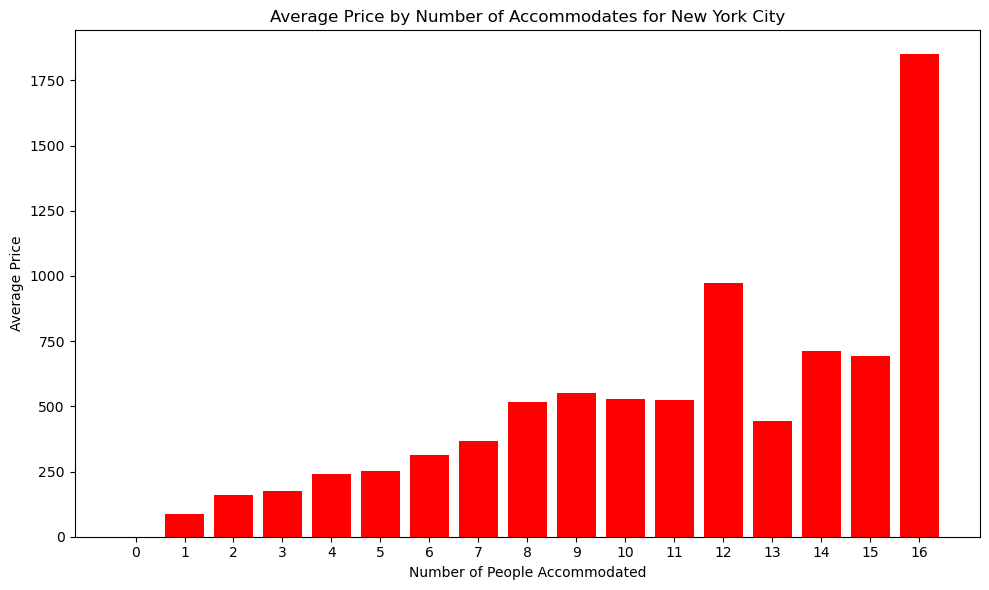

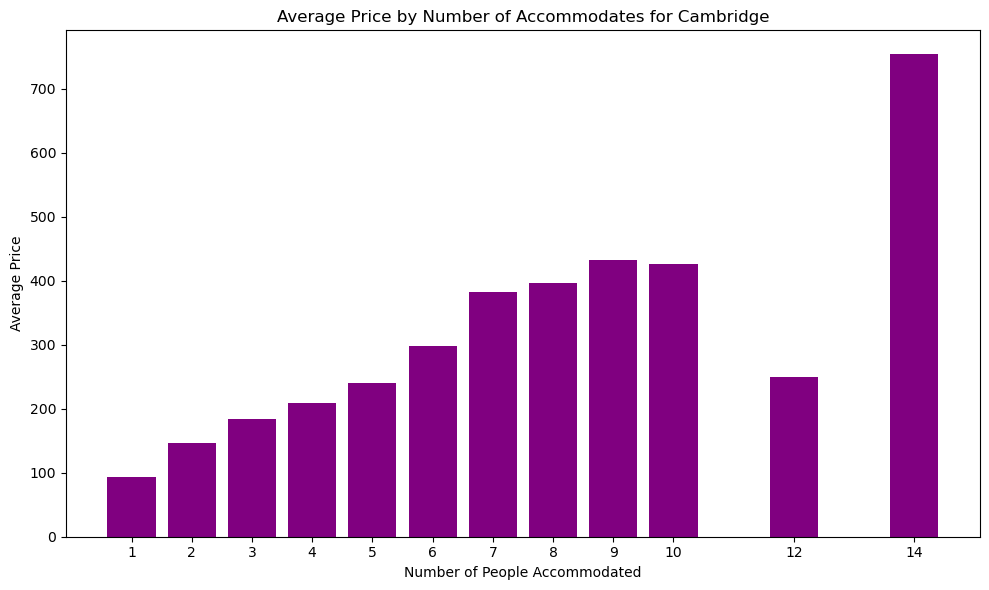

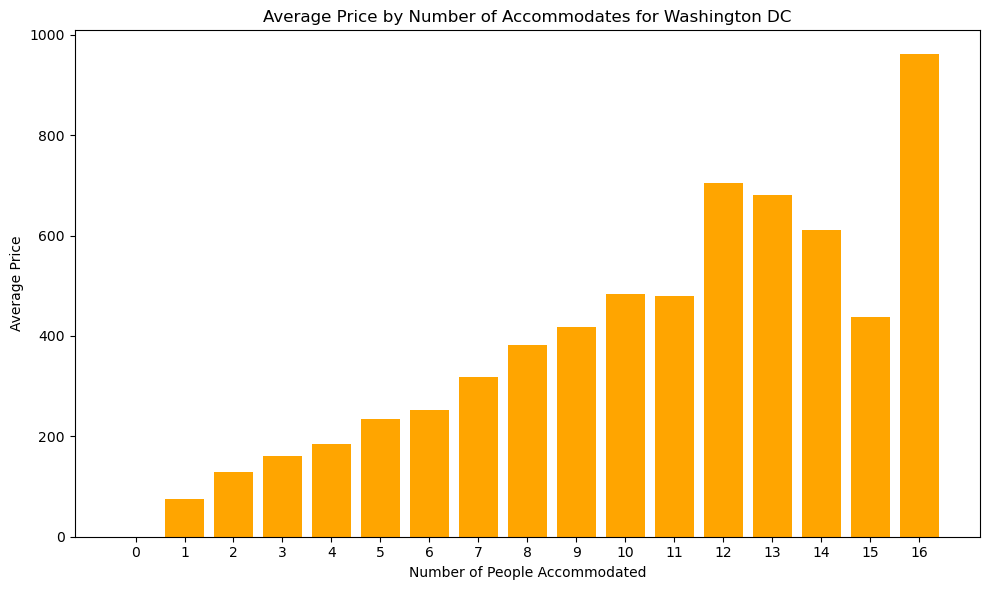

In [127]:
def plot_price_by_accommodates(df, city_name, color):
    # Group by 'accommodates' and calculate the mean price
    price_by_accommodates = df.groupby('accommodates')['price'].mean()
    
    # Sort the index to ensure the plot is ordered by the number of accommodates
    price_by_accommodates = price_by_accommodates.sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(price_by_accommodates.index, price_by_accommodates.values, color=color)
    
    plt.title(f'Average Price by Number of Accommodates for {city_name}')
    plt.xlabel('Number of People Accommodated')
    plt.ylabel('Average Price')
    plt.xticks(price_by_accommodates.index)
    plt.tight_layout()
    plt.show()

    return price_by_accommodates.to_frame(name='AveragePrice')



data_info = [
    ('Broward County', broward_listings_detailed_df),
    ('Jersey City', jersey_listings_detailed_df),
    ('New York City', nyc_listings_detailed_df),
    ('Cambridge', cambridge_listings_detailed_df),
    ('Washington DC', dc_listings_detailed_df)
]

# Colors for each location
colors = ['blue', 'green', 'red', 'purple', 'orange']

resulting_dataframes = {}

for i, (city_name, df) in enumerate(data_info):
    # Ensure 'price' is numeric
    df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True))
    
    resulting_dataframes[city_name] = plot_price_by_accommodates(df, city_name, colors[i])

##### Number of Reviews for each Neighborhood within an Eastern US City

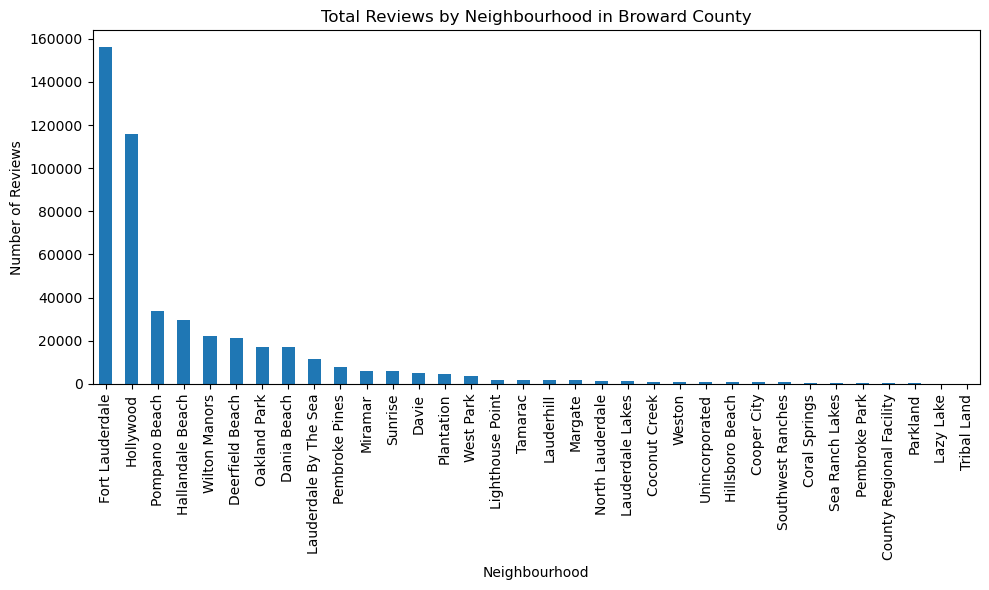

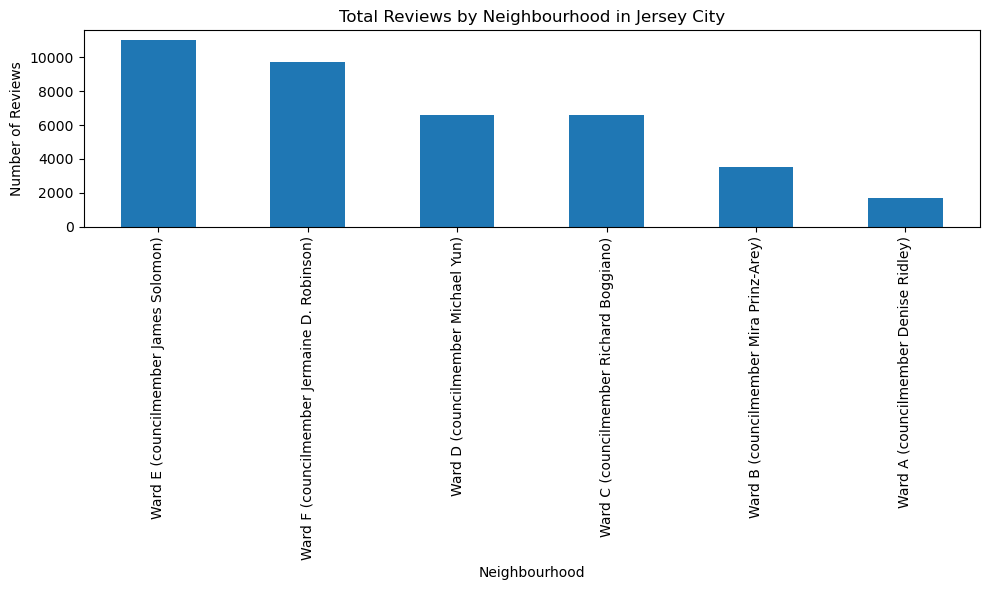

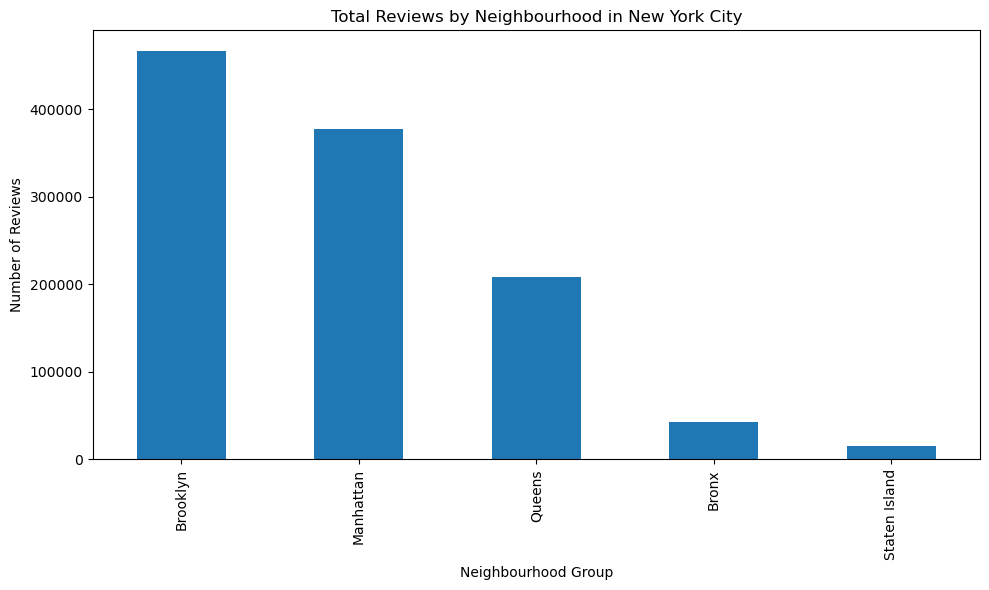

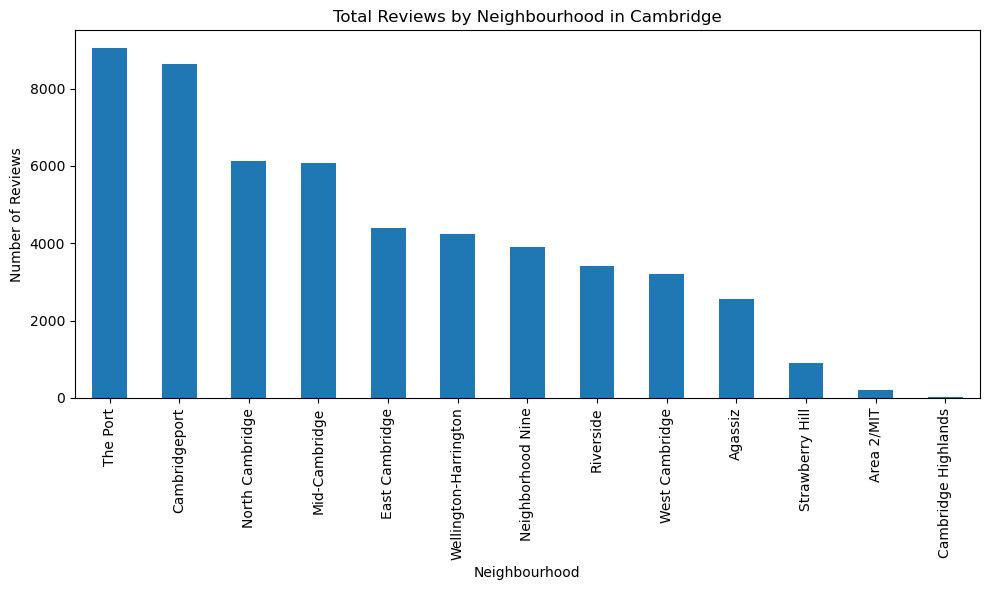

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\950438143.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


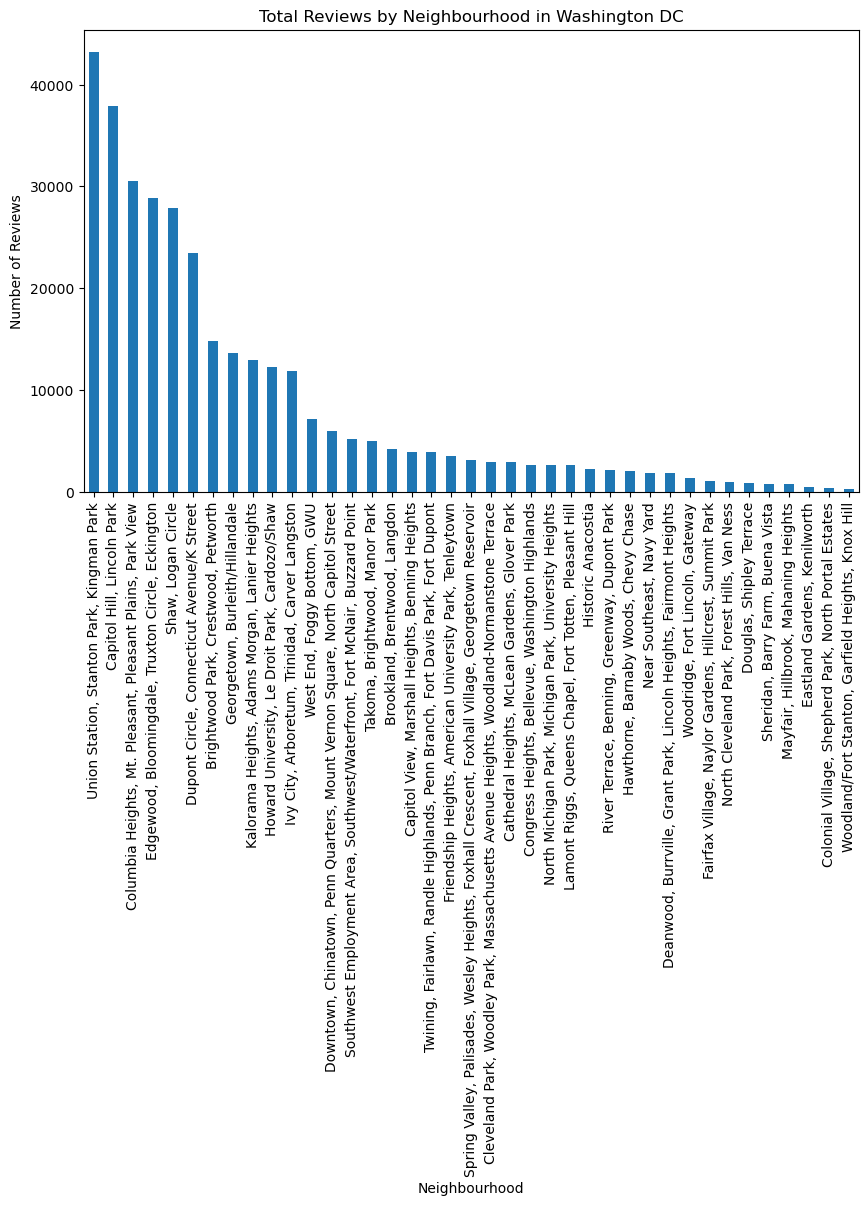

In [129]:
def plot_reviews_by_neighbourhood(dataframes):
    """
    Plots the sum of reviews for each neighbourhood or neighbourhood group for a set of cities.

    Parameters:
    - dataframes: A dictionary of DataFrames with city names as keys.
    """
    for city, df in dataframes.items():
        # Check if the city is NYC to decide which column to use for grouping as the column is different
        if city == 'New York City':
            group_column = 'neighbourhood_group_cleansed'
        else:
            group_column = 'neighbourhood_cleansed'
        
        # Group by the chosen column and sum the number of reviews
        reviews_sum = df.groupby(group_column)['number_of_reviews'].sum().sort_values(ascending=False)
        
        plt.figure(figsize=(10, 6))
        reviews_sum.plot(kind='bar')
        plt.title(f'Total Reviews by Neighbourhood in {city}')
        plt.xlabel('Neighbourhood' if group_column == 'neighbourhood_cleansed' else 'Neighbourhood Group')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

dataframes = {
    'Broward County': broward_listings_detailed_df,
    'Jersey City': jersey_listings_detailed_df,
    'New York City': nyc_listings_detailed_df,
    'Cambridge': cambridge_listings_detailed_df,
    'Washington DC': dc_listings_detailed_df
}

plot_reviews_by_neighbourhood(dataframes)

##### Correlation Heatmap of Review Scores and Price for each Eastern US City

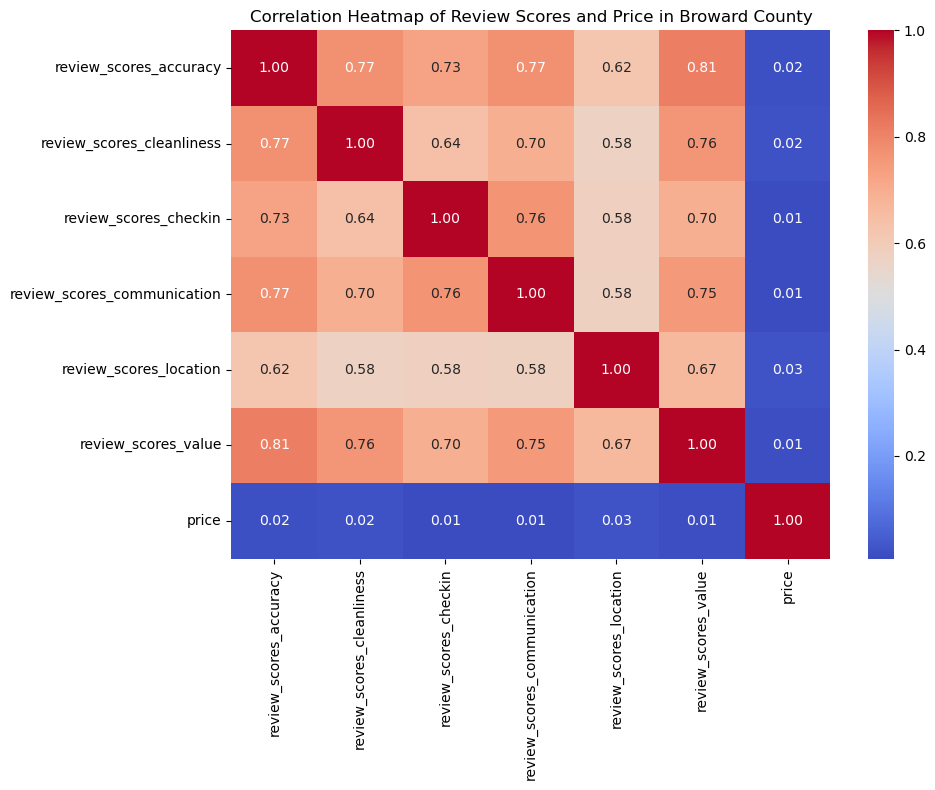

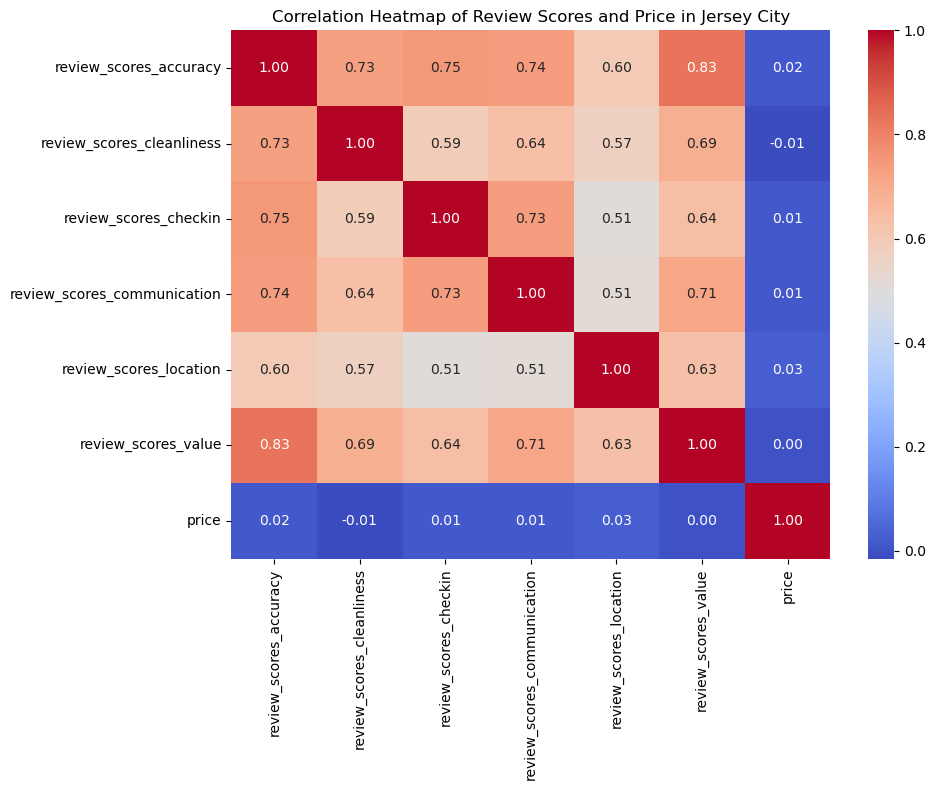

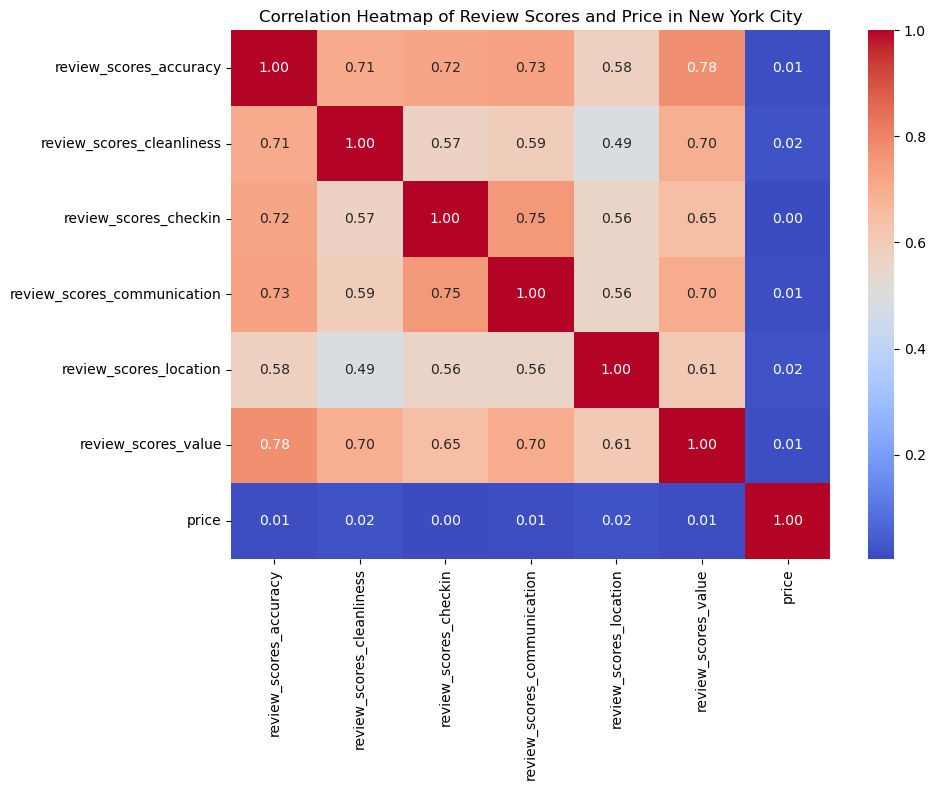

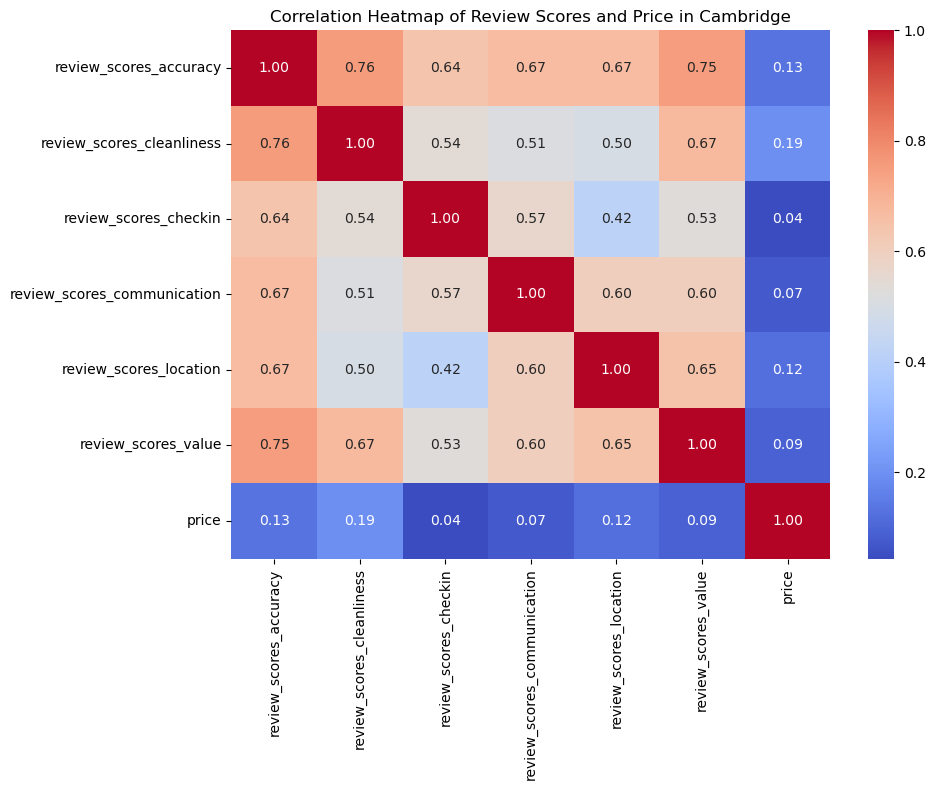

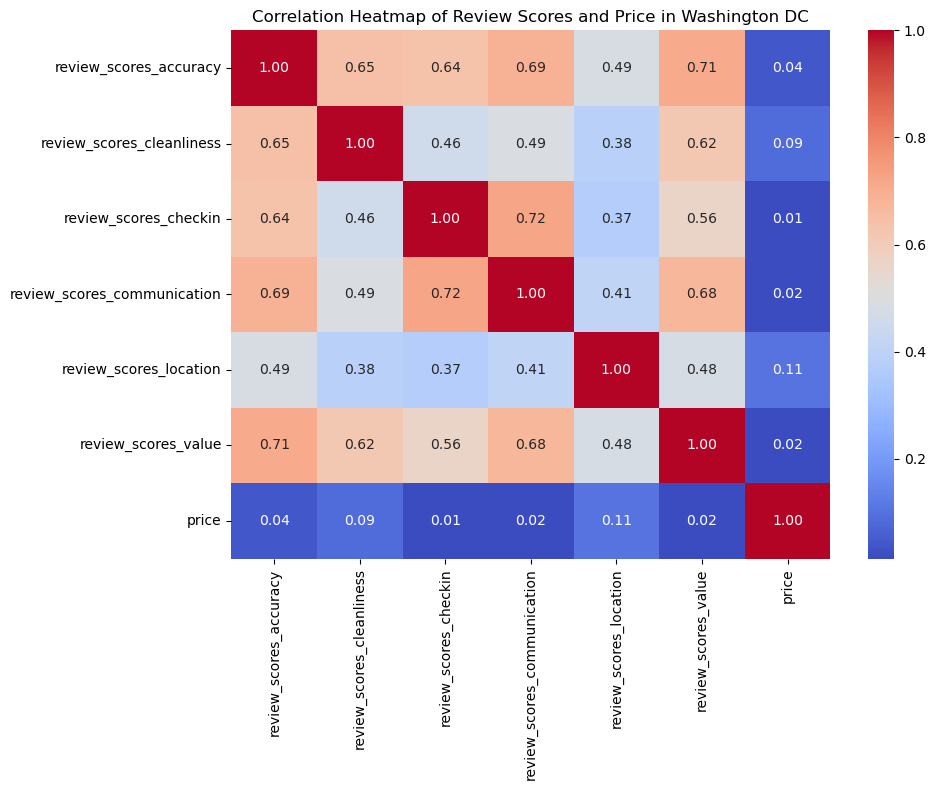

In [130]:
def plot_review_scores_heatmap(df, city_name):
    review_scores_columns = [
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value'
    ]

    # Select the columns for the heatmap and remove rows with NaN values
    heatmap_data = df[review_scores_columns + ['price']].dropna()

    # Calculate the correlation matrix
    correlation_matrix = heatmap_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap of Review Scores and Price in {city_name}')
    plt.tight_layout()
    plt.show()

dataframes = {
    'Broward County': broward_listings_detailed_df,
    'Jersey City': jersey_listings_detailed_df,
    'New York City': nyc_listings_detailed_df,
    'Cambridge': cambridge_listings_detailed_df,
    'Washington DC': dc_listings_detailed_df
}

for city_name, df in dataframes.items():
    plot_review_scores_heatmap(df, city_name)

## 3. listings EDA

In [131]:
broward_listings_df = pd.read_csv(broward_listings_path,  na_filter=False)
jersey_listings_df = pd.read_csv(jersey_listings_path,  na_filter=False)
nyc_listings_df = pd.read_csv(nyc_listings_path,  na_filter=False)
cambridge_listings_df = pd.read_csv(cambridge_listings_path,  na_filter=False)
dc_listings_df = pd.read_csv(dc_listings_path,  na_filter=False)

In [132]:
# Conduct initial data cleaning
def convert_listings_data(df):
    # Convert price column to string and then to numeric after removing '$' and ','
    df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
    
    # Convert date column to datetime and extract the date part
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce').dt.date
    
    columns_to_convert = ['reviews_per_month']
        
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    return df


# Applying the conversion function to each dataframe
broward_listings_df = convert_listings_data(broward_listings_df)
jersey_listings_df = convert_listings_data(jersey_listings_df)
nyc_listings_df = convert_listings_data(nyc_listings_df)
cambridge_listings_df = convert_listings_data(cambridge_listings_df)
dc_listings_df = convert_listings_data(dc_listings_df)

C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\213841791.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\213841791.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_16328\213841791.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions wi

##### Get standard EDA for listings such as number of rows & columns, missing values, ranges, and data types

In [133]:
def analyze_dataframes_listings(dataframes, threshold=20):
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        for column in df.columns:
            # Handling numeric columns
            if pd.api.types.is_numeric_dtype(df[column]):
                min_value = df[column].min()
                max_value = df[column].max()
                print(f"{column} (Numerical): Range = {min_value} to {max_value}")
            # Handling date columns, ensuring we skip NaN values for min/max
            elif pd.api.types.is_object_dtype(df[column]) and all(isinstance(x, (datetime.date, type(pd.NaT))) for x in df[column].dropna()):
                # Using dropna to ensure NaN values don't interfere with comparison
                non_na_values = df[column].dropna()
                if non_na_values.empty:
                    min_date = max_date = "No Dates Available"
                else:
                    min_date = non_na_values.min()
                    max_date = non_na_values.max()
                print(f"{column} (Date): Range = {min_date} to {max_date}")
            # Handling categorical columns
            else:
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {unique_values}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")

        
dataframes = {
    'Broward County': broward_listings_df,
    'Jersey City': jersey_listings_df,
    'New York City': nyc_listings_df,
    'Cambridge': cambridge_listings_df,
    'Washington DC': dc_listings_df
}

analyze_dataframes_listings(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 16899, Total Columns: 18
Total Missing Values: 5674
Missing Values by Column:
 - last_review: 2837 missing values
 - reviews_per_month: 2837 missing values
id (Numerical): Range = 57818 to 855979244654886532
name (Categorical): 16068 unique categories
host_id (Numerical): Range = 5146 to 506759471
host_name (Categorical): 3524 unique categories
neighbourhood_group (Categorical): Categories = ['']
neighbourhood (Categorical): 34 unique categories
latitude (Numerical): Range = 25.957322957283782 to 26.33341
longitude (Numerical): Range = -80.42812 to -80.07502
room_type (Categorical): Categories = ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
price (Numerical): Range = 0 to 100000
minimum_nights (Numerical): Range = 1 to 999
number_of_reviews (Numerical): Range = 0 to 815
last_review (Date): Range = 2012-11-01 to 2023-03-30
reviews_per_month (Numerical): Range = 0.01 to 30.15
calculated_host_listings_count (Numerical): Ran

## 4. reviews_detailed EDA
The listings_detailed EDA will have the following additional plots:
* Total Number of Reviews in Each City in Eastern US
* Total Number of Reviews per Day and per Year 
* Number of Times a Reviewer Written a Review within the Eastern US

In [135]:
broward_reviews_detailed_df = pd.read_csv(broward_reviews_detailed_path,  na_filter=False)
jersey_reviews_detailed_df = pd.read_csv(jersey_reviews_detailed_path,  na_filter=False)
nyc_reviews_detailed_df = pd.read_csv(nyc_reviews_detailed_path,  na_filter=False)
cambridge_reviews_detailed_df = pd.read_csv(cambridge_reviews_detailed_path,  na_filter=False)
dc_reviews_detailed_df = pd.read_csv(dc_reviews_detailed_path,  na_filter=False)

In [136]:
# Convert the date col to a date datatype
def convert_reviews_detailed_data(df):
    # Convert date column to datetime and extract the date part
    df['date'] = pd.to_datetime(df['date']).dt.date
    
    return df

# Applying the conversion function to each dataframe
broward_reviews_detailed_df = convert_reviews_detailed_data(broward_reviews_detailed_df)
jersey_reviews_detailed_df = convert_reviews_detailed_data(jersey_reviews_detailed_df)
nyc_reviews_detailed_df = convert_reviews_detailed_data(nyc_reviews_detailed_df)
cambridge_reviews_detailed_df = convert_reviews_detailed_data(cambridge_reviews_detailed_df)
dc_reviews_detailed_df = convert_reviews_detailed_data(dc_reviews_detailed_df)

##### Get standard EDA for reviews_detailed such as number of rows & columns, missing values, ranges, and data types

In [137]:
def analyze_dataframes_reviews_detailed(dataframes, threshold=20):
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        for column in df.columns:
            # Handling numeric columns
            if pd.api.types.is_numeric_dtype(df[column]):
                min_value = df[column].min()
                median_value = df[column].median()
                mean_value = df[column].mean()
                std_deviation = df[column].std()
                max_value = df[column].max()
                print(f"{column} (Numerical): Min = {min_value}, Median = {median_value}, Mean = {mean_value}, Std Dev = {std_deviation}, Max = {max_value}")
            # Handling date columns, ensuring we skip NaN values for min/max
            elif pd.api.types.is_object_dtype(df[column]) and all(isinstance(x, (datetime.date, pd.Timestamp)) for x in df[column].dropna()):
                non_na_values = df[column].dropna()
                if non_na_values.empty:
                    min_date = max_date = "No Dates Available"
                else:
                    min_date = non_na_values.min()
                    max_date = non_na_values.max()
                print(f"{column} (Date): Range = {min_date} to {max_date}")
            # Handling categorical columns
            else:
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {unique_values}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")

        
dataframes = {
    'Broward County': broward_reviews_detailed_df,
    'Jersey City': jersey_reviews_detailed_df,
    'New York City': nyc_reviews_detailed_df,
    'Cambridge': cambridge_reviews_detailed_df,
    'Washington DC': dc_reviews_detailed_df
}

analyze_dataframes_reviews_detailed(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 474589, Total Columns: 6
Total Missing Values: 0
listing_id (Numerical): Min = 57818, Median = 39588103.0, Mean = 9.054224355909088e+16, Std Dev = 2.2742542263257498e+17, Max = 855075285003600498
id (Numerical): Min = 308577, Median = 5.0354380859319846e+17, Mean = 3.919271541052734e+17, Std Dev = 3.342982325840613e+17, Max = 858719366597758908
date (Date): Range = 2011-06-11 to 2023-03-30
reviewer_id (Numerical): Min = 319, Median = 178821666.0, Mean = 205369164.27495793, Std Dev = 145440422.861456, Max = 506802956
reviewer_name (Categorical): 63801 unique categories
comments (Categorical): 447243 unique categories
------

Analyzing 'Jersey City' DataFrame:
Total Rows: 39129, Total Columns: 6
Total Missing Values: 0
listing_id (Numerical): Min = 40669, Median = 25122936.0, Mean = 5.647975398728877e+16, Std Dev = 1.8659206990953034e+17, Max = 847312523740789557
id (Numerical): Min = 103550, Median = 642937946.0, Mean = 2.738909124174012

##### Total Number of Reviews in Each City in Eastern US

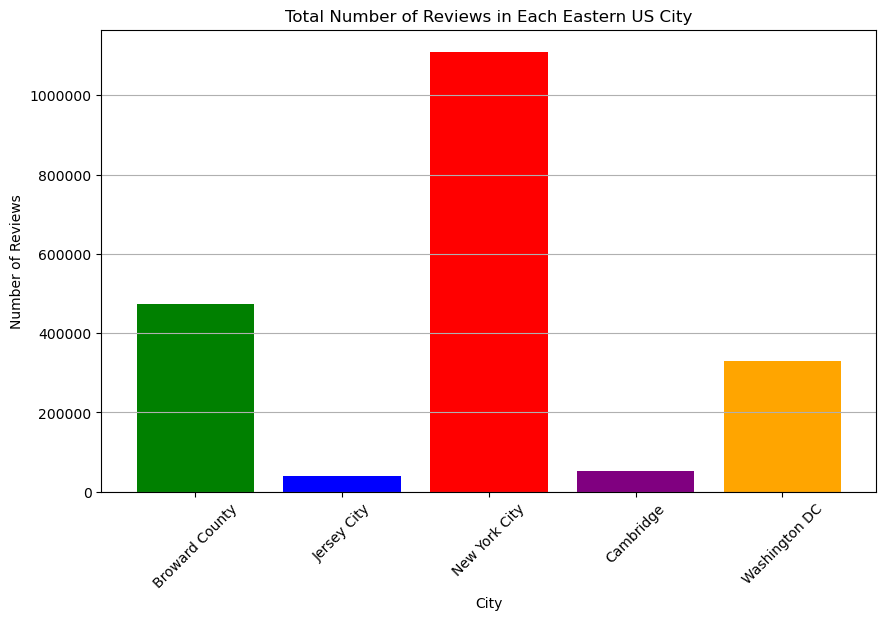

In [140]:
total_reviews = {
    'Broward County': len(broward_reviews_detailed_df),
    'Jersey City': len(jersey_reviews_detailed_df),
    'New York City': len(nyc_reviews_detailed_df),
    'Cambridge': len(cambridge_reviews_detailed_df),
    'Washington DC': len(dc_reviews_detailed_df)
}

plt.figure(figsize=(10, 6))

plt.bar(total_reviews.keys(), total_reviews.values(), color=['green', 'blue', 'red', 'purple', 'orange'])

plt.title('Total Number of Reviews in Each Eastern US City')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Custom formatter to display y-axis labels as whole numbers
def y_formatter(x, pos):
    return f'{int(x)}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))

plt.show()

##### Total Number of Reviews Per Day

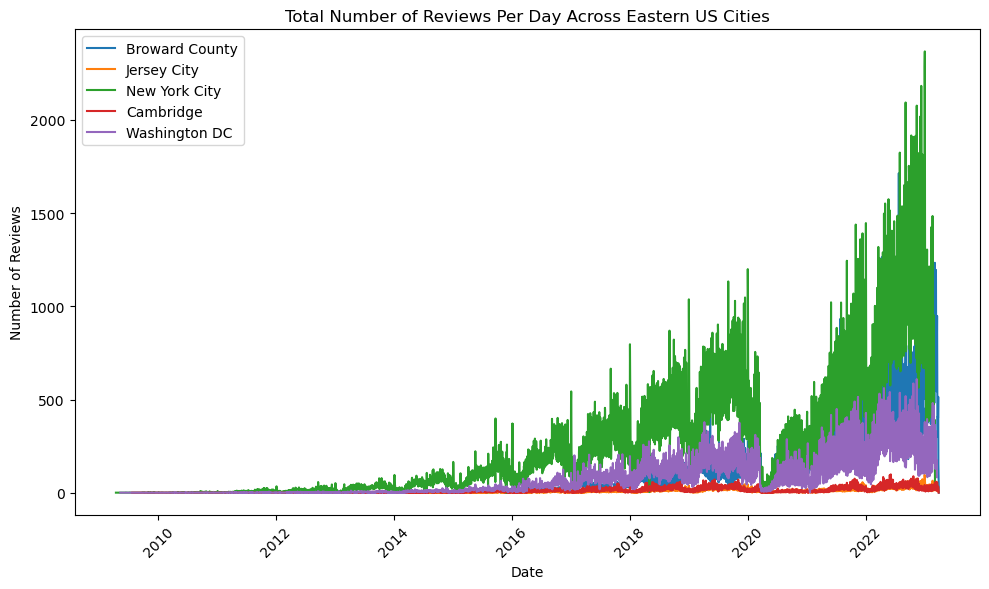

In [143]:
def plot_combined_daily_review_counts(dataframes):
    """
    Plots the combined daily review counts for multiple cities.
    
    """
    plt.figure(figsize=(10, 6))

    for city_name, df in dataframes.items():
        # Group by the 'date' column and count the number of reviews for each day
        daily_review_counts = df.groupby('date').size()

        daily_review_counts.plot(kind='line', label=city_name)

    plt.title('Total Number of Reviews Per Day Across Eastern US Cities')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

dataframes = {
    'Broward County': broward_reviews_detailed_df,
    'Jersey City': jersey_reviews_detailed_df,
    'New York City': nyc_reviews_detailed_df,
    'Cambridge': cambridge_reviews_detailed_df,
    'Washington DC': dc_reviews_detailed_df
}

plot_combined_daily_review_counts(dataframes)

##### Total Number of Reviews Per Year 

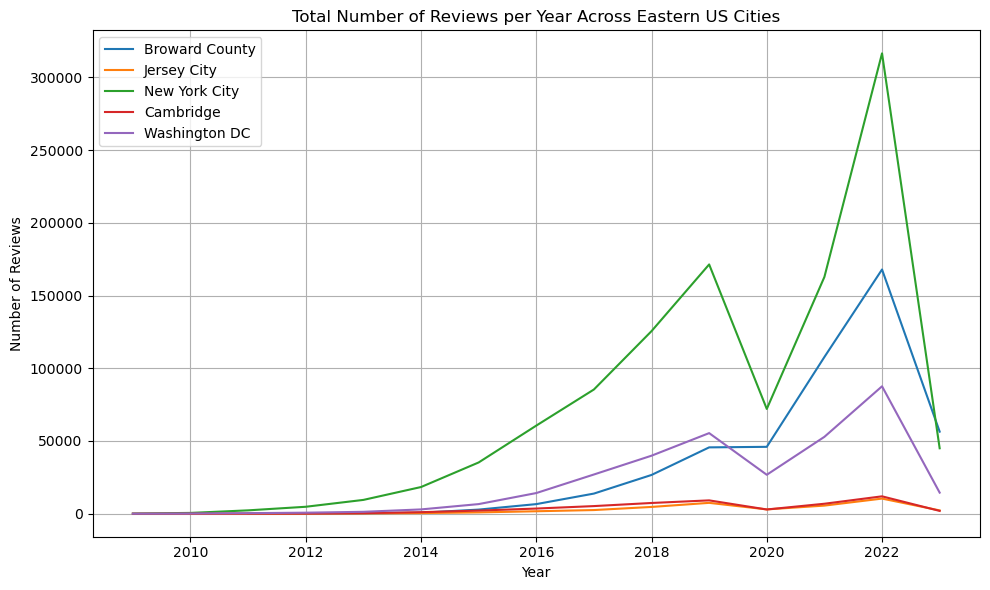

In [146]:
def plot_combined_annual_review_counts(dataframes):
    """
    Plots the combined annual review counts for multiple cities.
    
    """
    plt.figure(figsize=(10, 6))

    for city_name, df in dataframes.items():
        df['date'] = pd.to_datetime(df['date'])

        # Group by year and count the number of reviews for each year
        annual_review_counts = df.groupby(df['date'].dt.year).size()

        plt.plot(annual_review_counts.index, annual_review_counts.values, label=city_name)

    plt.title('Total Number of Reviews per Year Across Eastern US Cities')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


dataframes = {
    'Broward County': broward_reviews_detailed_df,
    'Jersey City': jersey_reviews_detailed_df,
    'New York City': nyc_reviews_detailed_df,
    'Cambridge': cambridge_reviews_detailed_df,
    'Washington DC': dc_reviews_detailed_df
}

plot_combined_annual_review_counts(dataframes)

##### Number of Times a Reviewer Written a Review within each Eastern US City

Note that if someone has written at least 5 reviews then it is categorized as 5+ for visibility purposes.

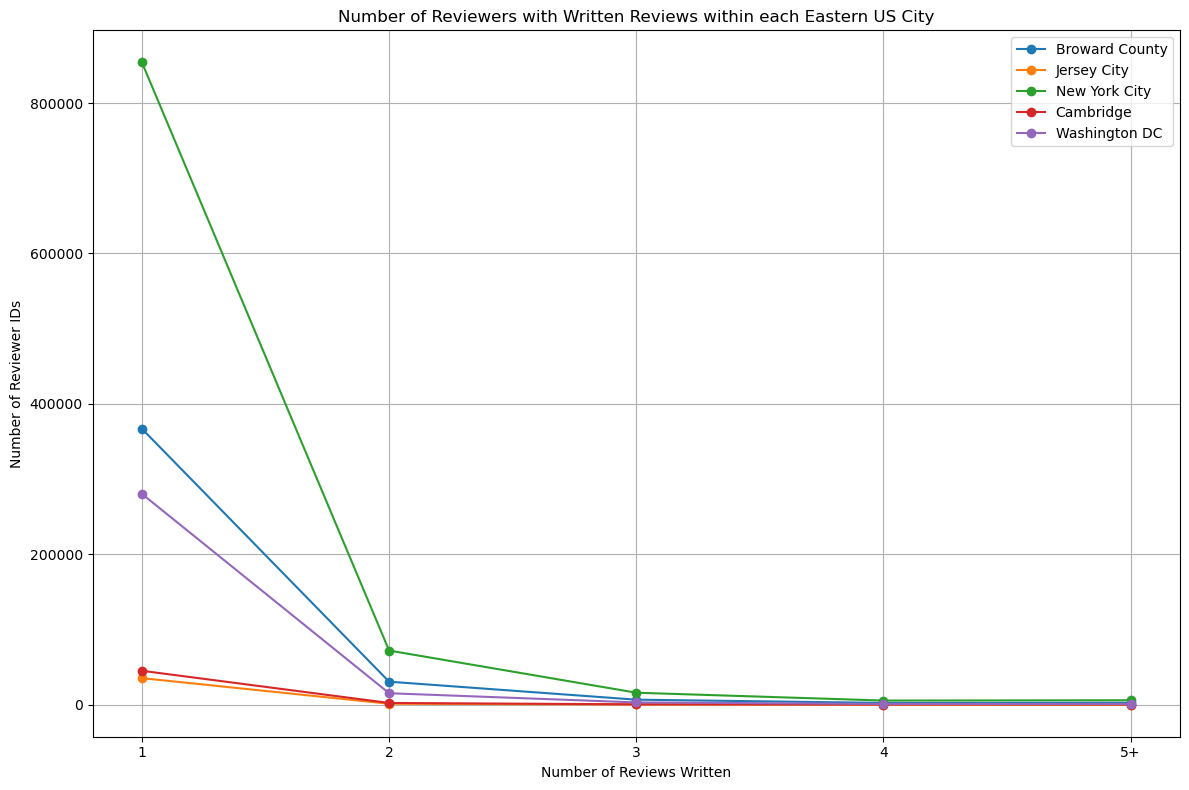

In [150]:
def plot_reviewer_distribution(dataframes):
    """
    Plots the distribution of the number of reviews written by reviewers for multiple dataframes,
    grouping all reviewers with more than 5 reviews under a '5+' category.
    """
    plt.figure(figsize=(12, 8))
    
    for city_name, df in dataframes.items():
        # Calculate the counts of reviews for each reviewer_id
        review_counts_per_reviewer = df['reviewer_id'].value_counts()

        # Cap the review counts at 5 for reviewers with more than 5 reviews
        capped_review_counts = review_counts_per_reviewer.apply(lambda x: min(x, 5))

        # Aggregate these counts to find out how many reviewers have written "5+"
        aggregated_review_counts = capped_review_counts.value_counts().sort_index()

        plot_data_x = aggregated_review_counts.index.astype(str)
        plot_data_x = plot_data_x[:-1].tolist() + ['5+']
        plot_data_y = aggregated_review_counts.values
        
        plt.plot(plot_data_x, plot_data_y, marker='o', label=city_name)
    
    plt.title('Number of Reviewers with Written Reviews within each Eastern US City')
    plt.xlabel('Number of Reviews Written')
    plt.ylabel('Number of Reviewer IDs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

dataframes = {
    'Broward County': broward_reviews_detailed_df,
    'Jersey City': jersey_reviews_detailed_df,
    'New York City': nyc_reviews_detailed_df,
    'Cambridge': cambridge_reviews_detailed_df,
    'Washington DC': dc_reviews_detailed_df
}

plot_reviewer_distribution(dataframes)

##### Number of Times a Reviewer Written a Review for any Eastern US City

Note that if someone has written at least 5 reviews then it is categorized as 5+ for visibility purposes.

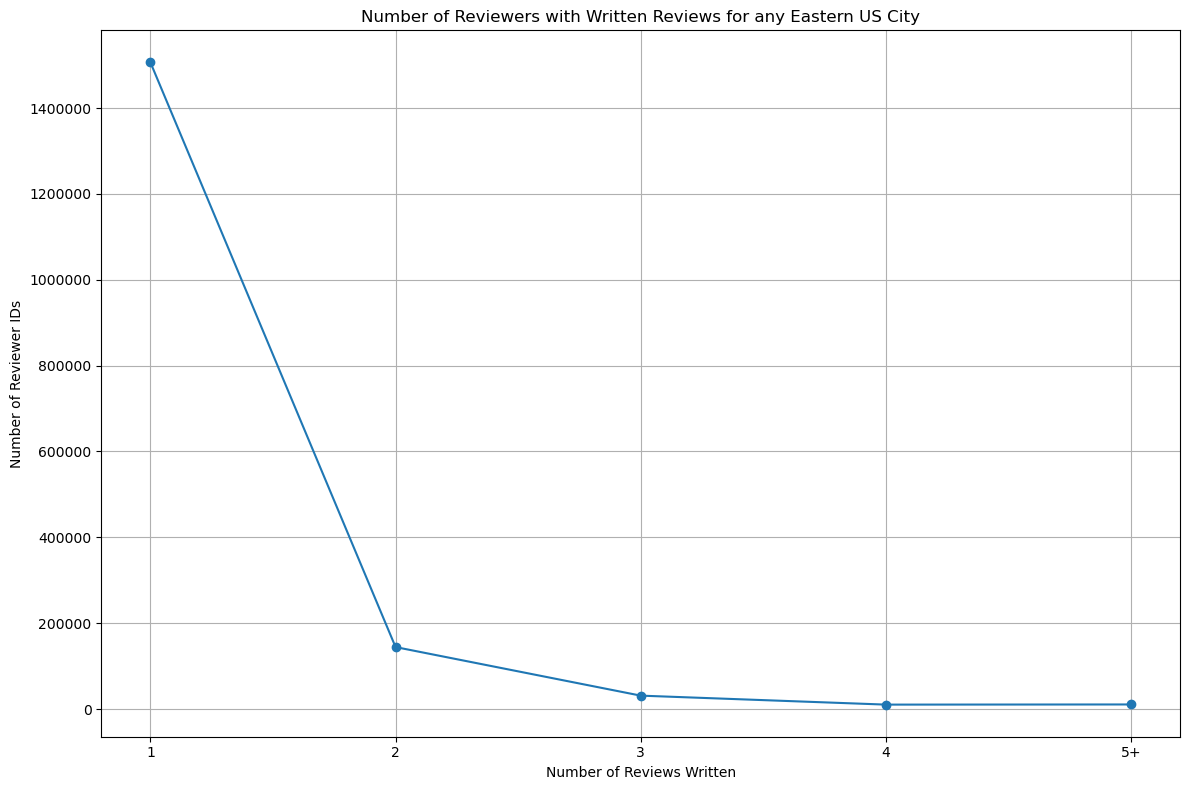

In [153]:

def plot_combined_reviewer_distribution(dataframes):
    """
    Plots the distribution of the number of reviews written by reviewers across multiple dataframes,
    grouping all reviewers with more than 10 reviews under a '5+' category, considering cross-city reviews.
    
    Parameters:
    - dataframes: Dictionary of city names and their corresponding DataFrames.
    """
    # Combine all dataframes with a new 'city' column to identify the origin
    combined_df_list = []
    for city_name, df in dataframes.items():
        df['city'] = city_name
        combined_df_list.append(df)
    
    combined_df = pd.concat(combined_df_list)
    
    # Calculate the counts of reviews for each reviewer_id across all cities
    review_counts_per_reviewer = combined_df['reviewer_id'].value_counts()
    
    # Cap the review counts at 5 for reviewers with more than 5 reviews
    capped_review_counts = review_counts_per_reviewer.apply(lambda x: min(x, 5))
    
    # Aggregate these counts to find out how many reviewers have written "5+"
    aggregated_review_counts = capped_review_counts.value_counts().sort_index()
    
    plt.figure(figsize=(12, 8))
    
    plot_data_x = aggregated_review_counts.index.astype(str)
    plot_data_x = plot_data_x[:-1].tolist() + ['5+']
    plot_data_y = aggregated_review_counts.values
    plt.plot(plot_data_x, plot_data_y, marker='o', linestyle='-')
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
    plt.title('Number of Reviewers with Written Reviews for any Eastern US City')
    plt.xlabel('Number of Reviews Written')
    plt.ylabel('Number of Reviewer IDs')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

dataframes = {
    'Broward County': broward_reviews_detailed_df,
    'Jersey City': jersey_reviews_detailed_df,
    'New York City': nyc_reviews_detailed_df,
    'Cambridge': cambridge_reviews_detailed_df,
    'Washington DC': dc_reviews_detailed_df
}

plot_combined_reviewer_distribution(dataframes)

## 5. reviews EDA

In [74]:
broward_reviews_df = pd.read_csv(broward_reviews_path,  na_filter=False)
jersey_reviews_df = pd.read_csv(jersey_reviews_path,  na_filter=False)
nyc_reviews_df = pd.read_csv(nyc_reviews_path,  na_filter=False)
cambridge_reviews_df = pd.read_csv(cambridge_reviews_path,  na_filter=False)
dc_reviews_df = pd.read_csv(dc_reviews_path,  na_filter=False)

In [75]:
# Convert the date column
def convert_reviews_data(df):
    # Convert date column to datetime and extract the date part
    df['date'] = pd.to_datetime(df['date']).dt.date
    
    return df


# Applying the conversion function to each dataframe
broward_reviews_df = convert_reviews_data(broward_reviews_df)
jersey_reviews_df = convert_reviews_data(jersey_reviews_df)
nyc_reviews_df = convert_reviews_data(nyc_reviews_df)
cambridge_reviews_df = convert_reviews_data(cambridge_reviews_df)
dc_reviews_df = convert_reviews_data(dc_reviews_df)

##### Get standard EDA for reviews such as number of rows & columns, missing values, ranges, and data types

In [154]:
def analyze_dataframes_reviews(dataframes, threshold=20):
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        for column in df.columns:
            # Handling numeric columns
            if pd.api.types.is_numeric_dtype(df[column]):
                min_value = df[column].min()
                max_value = df[column].max()
                print(f"{column} (Numerical): Range = {min_value} to {max_value}")
            # Handling date columns, ensuring we skip NaN values for min/max
            elif pd.api.types.is_object_dtype(df[column]) and all(isinstance(x, (datetime.date, type(pd.NaT))) for x in df[column].dropna()):
                # Using dropna to ensure NaN values don't interfere with comparison
                non_na_values = df[column].dropna()
                if non_na_values.empty:
                    min_date = max_date = "No Dates Available"
                else:
                    min_date = non_na_values.min()
                    max_date = non_na_values.max()
                print(f"{column} (Date): Range = {min_date} to {max_date}")
            # Handling categorical columns
            else:
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {unique_values}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")

        
dataframes = {
    'Broward County': broward_reviews_df,
    'Jersey City': jersey_reviews_df,
    'New York City': nyc_reviews_df,
    'Cambridge': cambridge_reviews_df,
    'Washington DC': dc_reviews_df
}

analyze_dataframes_reviews(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 474589, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 57818 to 855075285003600498
date (Date): Range = 2011-06-11 to 2023-03-30
------

Analyzing 'Jersey City' DataFrame:
Total Rows: 39129, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 40669 to 847312523740789557
date (Date): Range = 2010-09-23 to 2023-03-27
------

Analyzing 'New York City' DataFrame:
Total Rows: 1110024, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 2595 to 839119919829213270
date (Date): Range = 2009-04-13 to 2023-03-06
------

Analyzing 'Cambridge' DataFrame:
Total Rows: 52690, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 8521 to 840025605998923864
date (Date): Range = 2009-07-23 to 2023-03-29
------

Analyzing 'Washington DC' DataFrame:
Total Rows: 330237, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 3686 to 847348195894908022
dat

## 6. neighbourhoods EDA

In [155]:
broward_neighbourhoods_df = pd.read_csv(broward_neighbourhoods_path,  na_filter=False)
jersey_neighbourhoods_df = pd.read_csv(jersey_neighbourhoods_path,  na_filter=False)
nyc_neighbourhoods_df = pd.read_csv(nyc_neighbourhoods_path,  na_filter=False)
cambridge_neighbourhoods_df = pd.read_csv(cambridge_neighbourhoods_path,  na_filter=False)
dc_neighbourhoods_df = pd.read_csv(dc_neighbourhoods_path,  na_filter=False)

##### Get standard EDA for neighbourhoods such as number of rows & columns, missing values, ranges, and data types

In [156]:
def analyze_dataframes_neighbourhoods(dataframes, threshold=20):
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        for column in df.columns:
            # Handling numeric columns
            if pd.api.types.is_numeric_dtype(df[column]):
                min_value = df[column].min()
                max_value = df[column].max()
                print(f"{column} (Numerical): Range = {min_value} to {max_value}")
            # Handling date columns, ensuring we skip NaN values for min/max
            elif pd.api.types.is_object_dtype(df[column]) and all(isinstance(x, (datetime.date, type(pd.NaT))) for x in df[column].dropna()):
                # Using dropna to ensure NaN values don't interfere with comparison
                non_na_values = df[column].dropna()
                if non_na_values.empty:
                    min_date = max_date = "No Dates Available"
                else:
                    min_date = non_na_values.min()
                    max_date = non_na_values.max()
                print(f"{column} (Date): Range = {min_date} to {max_date}")
            # Handling categorical columns
            else:
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {unique_values}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")

        
dataframes = {
    'Broward County': broward_reviews_df,
    'Jersey City': jersey_reviews_df,
    'New York City': nyc_reviews_df,
    'Cambridge': cambridge_reviews_df,
    'Washington DC': dc_reviews_df
}

analyze_dataframes_neighbourhoods(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 474589, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 57818 to 855075285003600498
date (Date): Range = 2011-06-11 to 2023-03-30
------

Analyzing 'Jersey City' DataFrame:
Total Rows: 39129, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 40669 to 847312523740789557
date (Date): Range = 2010-09-23 to 2023-03-27
------

Analyzing 'New York City' DataFrame:
Total Rows: 1110024, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 2595 to 839119919829213270
date (Date): Range = 2009-04-13 to 2023-03-06
------

Analyzing 'Cambridge' DataFrame:
Total Rows: 52690, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 8521 to 840025605998923864
date (Date): Range = 2009-07-23 to 2023-03-29
------

Analyzing 'Washington DC' DataFrame:
Total Rows: 330237, Total Columns: 2
Total Missing Values: 0
listing_id (Numerical): Range = 3686 to 847348195894908022
dat

## 7. neighbourhoods geojson EDA

In [157]:
broward_neighbourhoods_json_df = pd.read_json(broward_neighbourhoods_json_path)
jersey_neighbourhoods_json_df = pd.read_json(jersey_neighbourhoods_json_path)
nyc_neighbourhoods_json_df = pd.read_json(nyc_neighbourhoods_json_path)
cambridge_neighbourhoods_json_df = pd.read_json(cambridge_neighbourhoods_json_path)
dc_neighbourhoods_json_df = pd.read_json(dc_neighbourhoods_json_path)

##### Get standard EDA for neighbourhoods geojson such as number of rows & columns, missing values, ranges, and data types

In [158]:
def analyze_dataframes_neighbourhoods_geojson(dataframes, threshold=20):
    for df_name, df in dataframes.items():
        print(f"Analyzing '{df_name}' DataFrame:")
        print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
        
        # Missing values
        missing_values_count = df.isnull().sum()
        total_missing = missing_values_count.sum()
        print(f"Total Missing Values: {total_missing}")
        if total_missing > 0:
            print("Missing Values by Column:")
            for column, missing_count in missing_values_count.iteritems():
                if missing_count > 0:
                    print(f" - {column}: {missing_count} missing values")
        
        for column in df.columns:
            # Handling numeric columns
            if pd.api.types.is_numeric_dtype(df[column]):
                min_value = df[column].min()
                max_value = df[column].max()
                print(f"{column} (Numerical): Range = {min_value} to {max_value}")
            # Handling date columns, ensuring we skip NaN values for min/max
            elif pd.api.types.is_datetime64_any_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
                non_na_values = df[column].dropna()
                # Check if all values are date or datetime instances
                if all(isinstance(x, (datetime.date, pd.Timestamp)) for x in non_na_values):
                    if non_na_values.empty:
                        min_date = max_date = "No Dates Available"
                    else:
                        min_date = non_na_values.min()
                        max_date = non_na_values.max()
                    print(f"{column} (Date): Range = {min_date} to {max_date}")
            # Handling categorical columns
            else:
                unique_values = df[column].unique()
                if len(unique_values) <= threshold:
                    print(f"{column} (Categorical): Categories = {', '.join(map(str, unique_values))}")
                else:
                    print(f"{column} (Categorical): {len(unique_values)} unique categories")
        print("------\n")



dataframes = {
    'Broward County': broward_neighbourhoods_json_df,
    'Jersey City': jersey_neighbourhoods_json_df,
    'New York City': nyc_neighbourhoods_json_df,
    'Cambridge': cambridge_neighbourhoods_json_df,
    'Washington DC': dc_neighbourhoods_json_df
}

analyze_dataframes_neighbourhoods_geojson(dataframes)

Analyzing 'Broward County' DataFrame:
Total Rows: 89, Total Columns: 2
Total Missing Values: 0
------

Analyzing 'Jersey City' DataFrame:
Total Rows: 6, Total Columns: 2
Total Missing Values: 0
------

Analyzing 'New York City' DataFrame:
Total Rows: 233, Total Columns: 2
Total Missing Values: 0
------

Analyzing 'Cambridge' DataFrame:
Total Rows: 13, Total Columns: 2
Total Missing Values: 0
------

Analyzing 'Washington DC' DataFrame:
Total Rows: 39, Total Columns: 2
Total Missing Values: 0
------



##### Create geojson rendered plots from the files for each of the Eastern US Cities

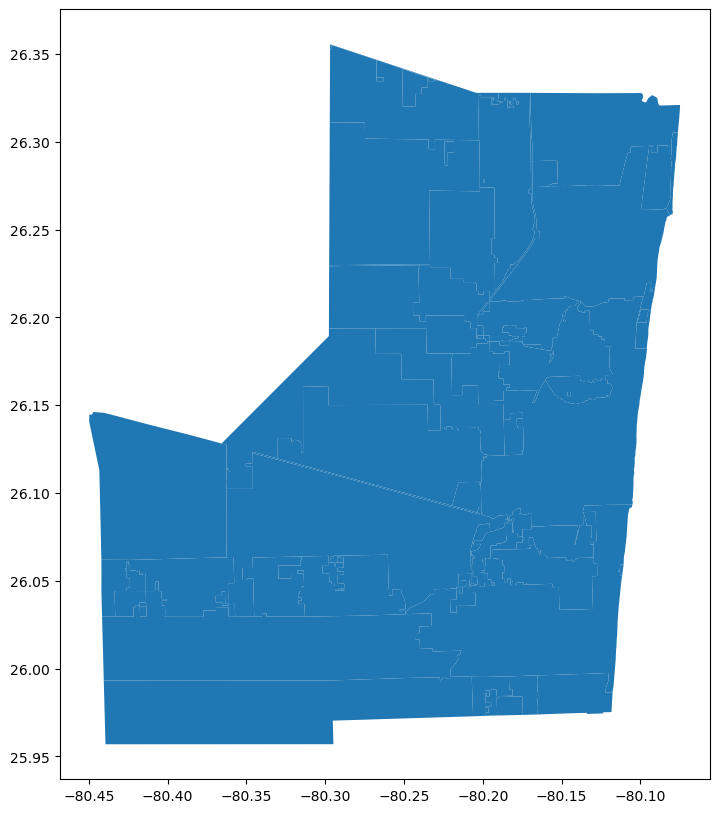

In [85]:
# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(broward_neighbourhoods_json_path)

# Plotting the geometries - showing broward county map
gdf.plot(figsize=(10, 10))
plt.show()

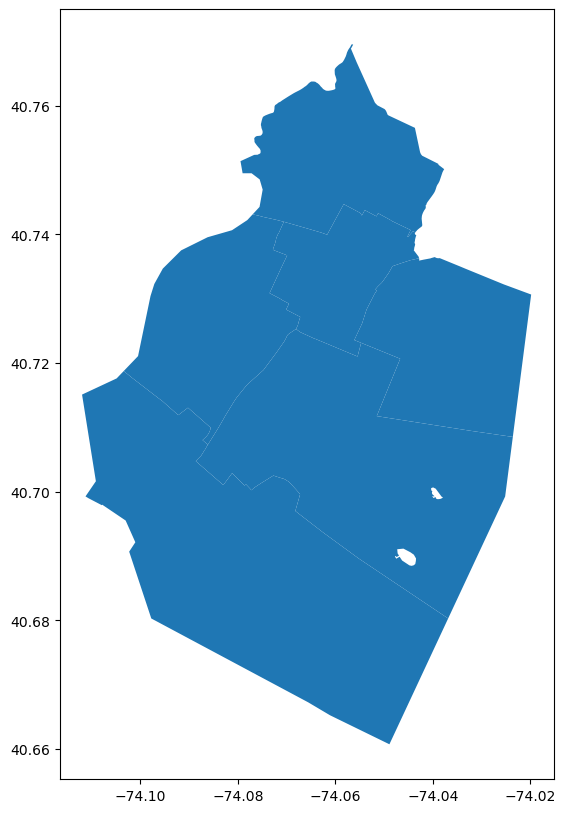

In [87]:
# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(jersey_neighbourhoods_json_path)

# Plotting the geometries - showing Jersey City map
gdf.plot(figsize=(10, 10))
plt.show()


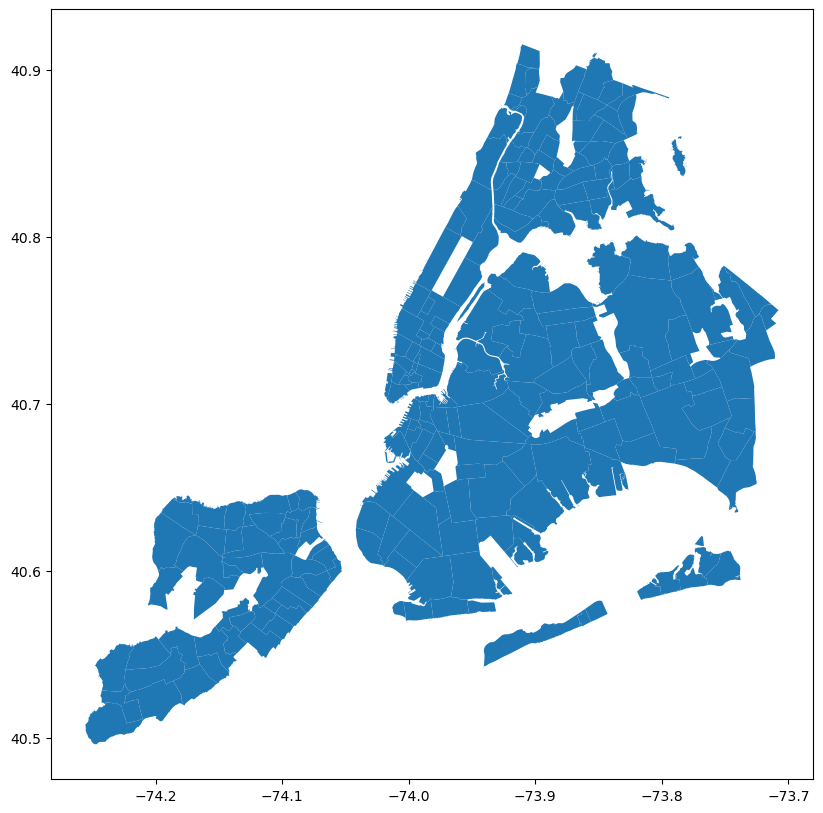

In [88]:
# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(nyc_neighbourhoods_json_path)

# Plotting the geometries - showing NYC map
gdf.plot(figsize=(10, 10))
plt.show()


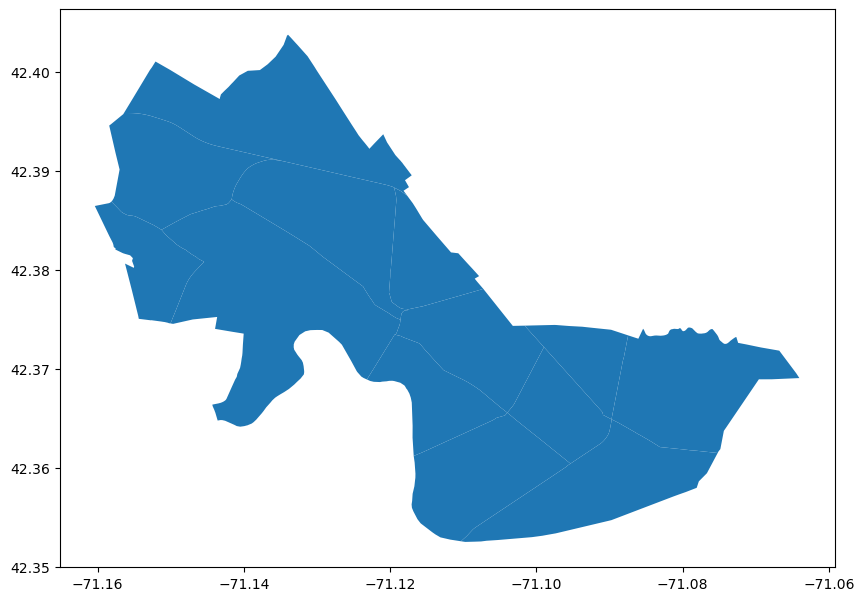

In [89]:
# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(cambridge_neighbourhoods_json_path)

# Plotting the geometries - showing Cambridge map
gdf.plot(figsize=(10, 10))
plt.show()


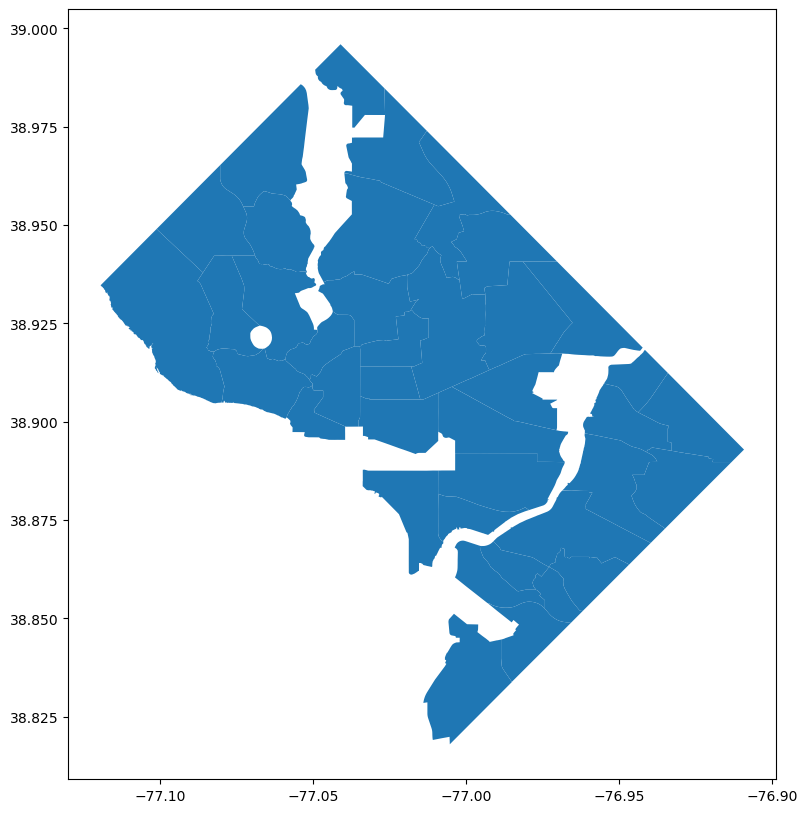

In [90]:
# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file(dc_neighbourhoods_json_path)

# Plotting the geometries - showing Washington D.C. map
gdf.plot(figsize=(10, 10))
plt.show()
